# **Max Life Insurance Cross Sell Prediction**

## **Project Summary**

Insurance companies provides vehicle insurance to its customers just like other insurance, medical insurance, life insurance, etc.

An insurance policy is an arrangement by which company undertakes provider guarantee of compensation for specific loss, damage, illness or death in return for the payment of specified premium. Customers need to pay regularly to an insurance company for this guarantee. The amount of money provided by company depends upon the policy agreement.


In vehicle insurance customer needs to pay a premium of certain amount every year to the insurance provider company so that in case of an unfortunate accident happens the vehicle insurance will cover financial loss as the insurance company will provide compensation to the customer.
So the objective is to build a model which can predict that the customer would be interested in buying vehicle insurance. So they can reach the customers in advance and optimise its business model and revenue.


In order to predict the customer would be interested in vehicle insurance we have a dataset of certain demographics which contains gender, age, region code, vehicle age, damages, previous insurance, policy, etc.

In [4]:
import IPython
IPython.display.Image(url="https://www.iciciprulife.com/content/dam/icicipru/products/health-insurance/health-Insurance.png")

## **GitHub Link**

* [GitHub profile](https://www.github.com/FirmBase)
* [GitHub project](https://github.com/FirmBase/Health-Insurance-Cross-Sell-Prediction.git)

## Steps:

1. Overview Data
2. Understanding Data
3. Exploratory Data Analysis
	* Data Cleaning
	* Data Manipulation
	* Data Visualization
4. Feature Engineering and Data Pre-processing:
	* Feature encoding
5. Data Resampling
6. Data Splitting
7. Data normalization
8. Machine Learning model implementation:
	1. Logical Regression
	2. Decision Tree
	3. Random Forest Regressor
	4. KNN
	5. Graident Boost
	6. XG Boost
	7. LightBGM
9. Performace comparision
10. Conclusion

## **Dataset description**

* ***id:*** Unique ID for  customer.
* ***Age:*** Age of the customer.
* ***Driving_License:*** Customer has DL or not.
* ***Region_Code:*** Unique code for the region of the customer.
* ***Previously_Insured:*** Customer already has Vehicle Insurance or not.
* ***Vehicle_Age:*** Age of the Vehicle.
* ***Vehicle_Damage:*** Past damages present or not.
* ***Annual_Premium:*** The amount customer needs to pay as premium.
* ***PolicySalesChannel:*** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* ***Vintage:*** Number of Days, Customer has been associated with the company.
* ***Response:*** Customer is interested or not.

## A small insights from the problem statement and data description

### Insurance firm?

* An insurance firm is a company that provides financial protection or reimbursement against losses or damages, typically in exchange for payment of a premium.

### Probability of buying an insurance?

* The probability of buying insurance depends on various factors including individual risk perception, financial situation, and the perceived value of the insurance coverage. It varies from person to person and is influenced by factors such as age, health, lifestyle, and the specific type of insurance being considered.

### Insurance firm can protect its customers?

* An insurance firm can protect its customers by providing various types of insurance coverage tailored to their needs, offering financial reimbursement or assistance in case of covered losses or damages. Additionally, they can provide excellent customer service, transparent policies, and prompt claims processing to ensure customer satisfaction and peace of mind.

### Importance of insurance and how it is helpful?

* Lets say about four in 10 men describe themselves as being very knowledgeable about life insurance.  As in the problem statement, about 2 or 3 get hospitalized out of 100, which means 2 to 3 percent claim the insurance. This way everyone shares the risk of everyone else.


So we need to building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. Now, we need to predict whether the customer would be interested in Vehicle insurance or not.

## Libraries required

In [1]:
# importing required libraries
import pandas as pd 
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt
# Defining static display plot
%matplotlib inline
# Defining dynamic display plot
# %matplotlib notebook
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Hyperparamter Tuning
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from lightgbm import LGBMClassifier, reset_parameter
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

#import warnings
import warnings
warnings.filterwarnings("ignore") 

## Load the dataset

### Loading dataset in **Google Colab**

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/Dataset/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

Mounted at /content/drive


### Loading dataset from **GitHub** respository

In [5]:
import requests
import io

def getFileFromURL(url):
	try:
		response = requests.get(url)
		if response.status_code == 200:
			file = pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')))
			print(url, "loaded.")
			return file
		else:
			print("CSV fetching failed with response code:", response.status_code)
	except requests.exceptions.HTTPError as err:
		print("HTTP error:", err)
	except Exception as err:
		print("Error:", err)

df = getFileFromURL("https://raw.githubusercontent.com/FirmBase/Health-Insurance-Cross-Sell-Prediction/main/Dataset/TRAIN-HEALTH%20INSURANCE%20CROSS%20SELL%20PREDICTION.csv")

https://raw.githubusercontent.com/FirmBase/Health-Insurance-Cross-Sell-Prediction/main/Dataset/TRAIN-HEALTH%20INSURANCE%20CROSS%20SELL%20PREDICTION.csv loaded.


In [6]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Step 1. Overview Data

### Dataset shape

In [3]:
{'Rows': df.shape[0], 'Columns': df.shape[1]}

{'Rows': 381109, 'Columns': 12}

# Step 3. Exploratory Data Analysis

## Overview of dataset

In [5]:
df.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [6]:
df.tail(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


# Step 2. Understanding Data

## Dataset datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


*   From the above dataset information,There are 14 columns, 10 columns are integer and float types and 4 columns are object types. 

## **Statistical data**

### Dataset description

In [5]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,381109.0,NaN,NaN,NaN,190555.0,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Gender,381109,2,Male,206089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,381109.0,NaN,NaN,NaN,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,NaN,NaN,NaN,0.997869,0.04611,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,NaN,NaN,NaN,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,NaN,NaN,NaN,0.45821,0.498251,0.0,0.0,0.0,1.0,1.0
Vehicle_Age,381109,3,1-2 Year,200316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,381109,2,Yes,192413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,381109.0,NaN,NaN,NaN,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,NaN,NaN,NaN,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0


### Missing values in the dataset

In [6]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: >

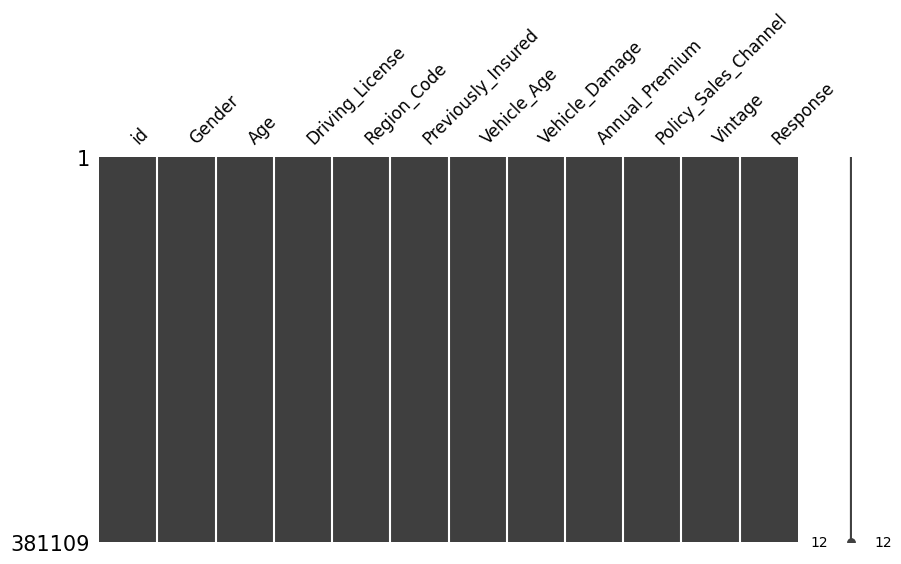

In [7]:
msno.matrix(df, figsize=(10,5), fontsize=12)

*   There are no missing values in the dataset


### Identifying and printing duplicate values

In [3]:
len(df[df.duplicated()])

0


*   there were no duplicate values found in the dataset


## Visualizing dataset

### Box-plot of columns

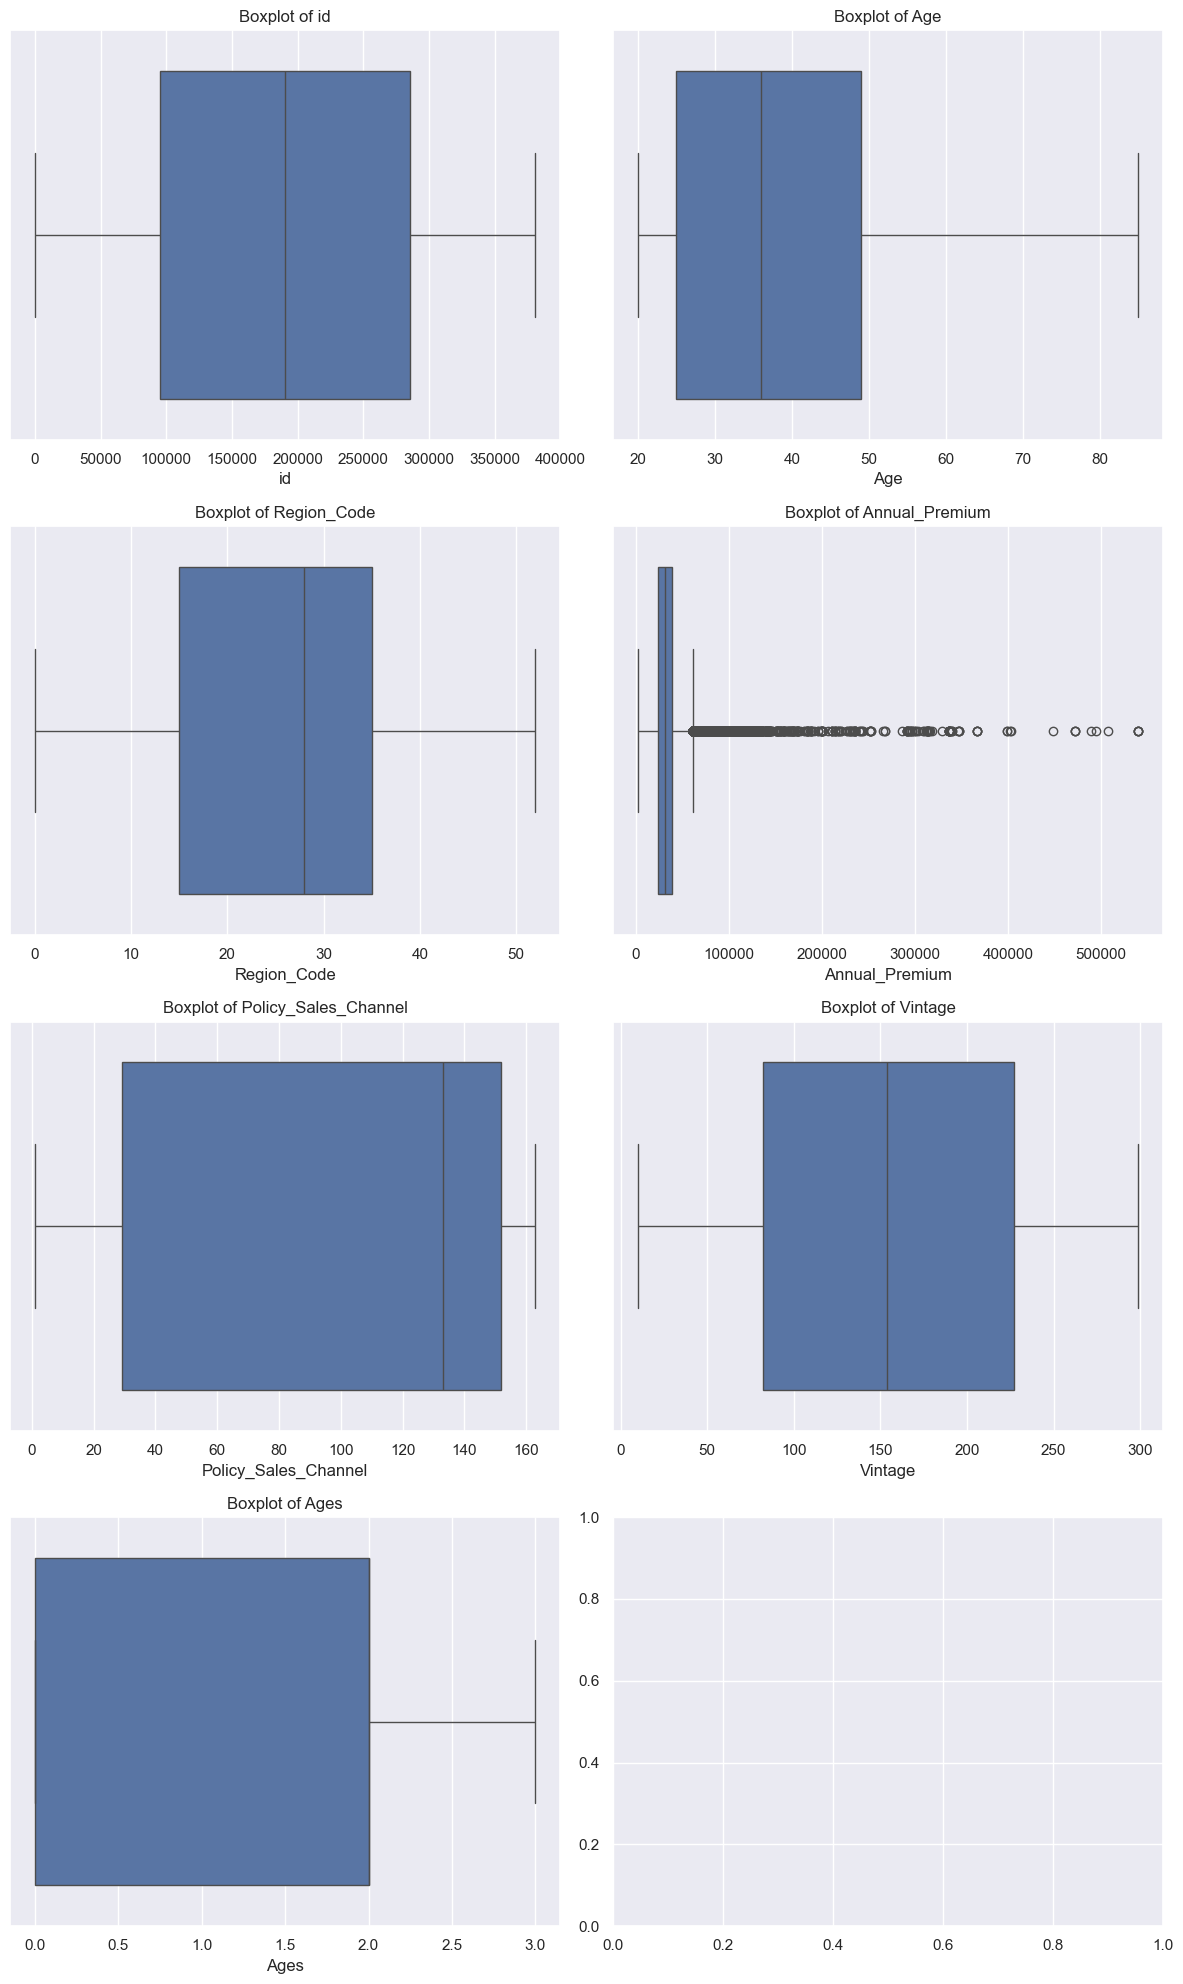

In [69]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))

for i, variable in enumerate([element for element in df.columns if element not in ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response', 'Age_label']]):
	sns.boxplot(x=variable, data=df, ax=axes.flatten()[i])
	axes.flatten()[i].set_title(f'Boxplot of {variable}')

plt.tight_layout()
plt.show()

* From the boxplot we can observe lot of outliers in 'Annual_Premium' other than that is all fine.

# Step 3. Data Visualization

### Responses

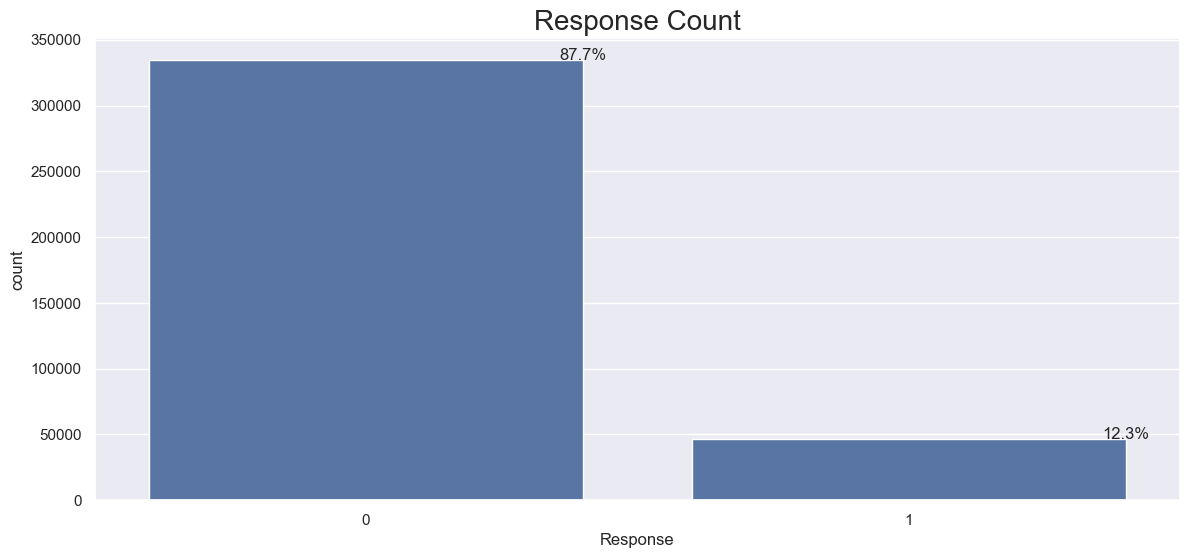

In [10]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 6))
total = float(len(df))
ax = sns.countplot(x='Response', data=df)
plt.title('Response Count', fontsize=20)
for p in ax.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax.annotate(percentage, (x, y), ha='center')
plt.show()

* Data imbalanced, 12.3% people interested while 87.7% people are not.


### Gender data

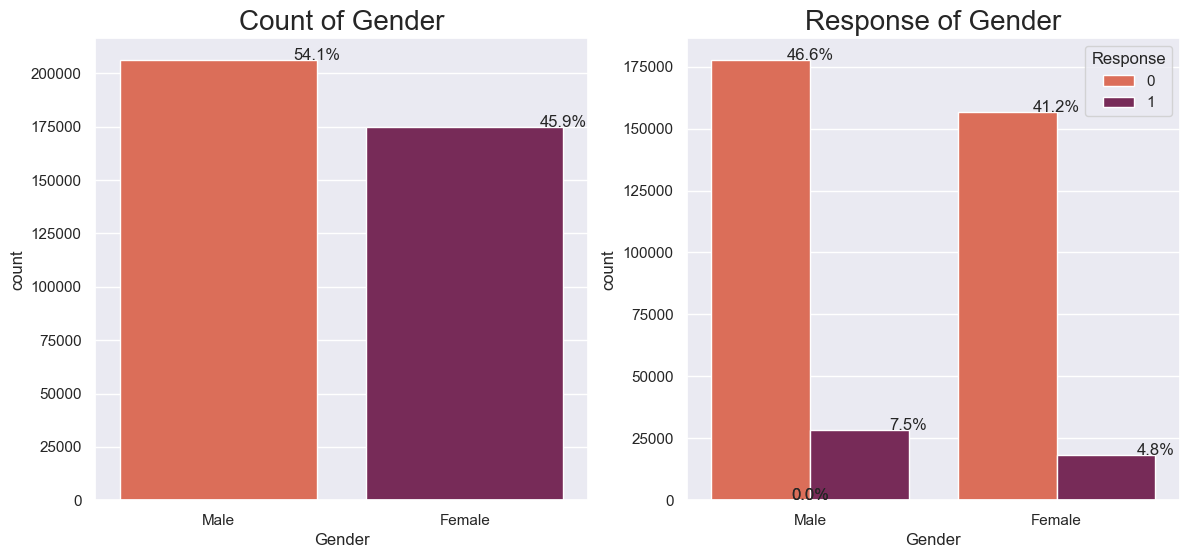

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Gender',palette="rocket_r", data=df)
plt.title('Count of Gender', fontsize=20)
for p in ax1.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax1.annotate(percentage, (x, y), ha='center')
plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Gender', hue='Response', palette="rocket_r", data=df)
plt.title('Response of Gender',fontsize=20)
for p in ax2.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax2.annotate(percentage, (x, y), ha='center')
plt.show()


Graph indicates,

* The gender dataset is spread nearly evenly. The male category is marginally larger than the female category, and the likelihood of purchasing insurance is also slightly higher.

* The responses of those who are not interested in vehicle insurance is higher than that of those who are interested to buy vehicle insurance.

* Only 12.3% people interested while 87.7% people are not interested to buy vehicle insurance.


### Driving License

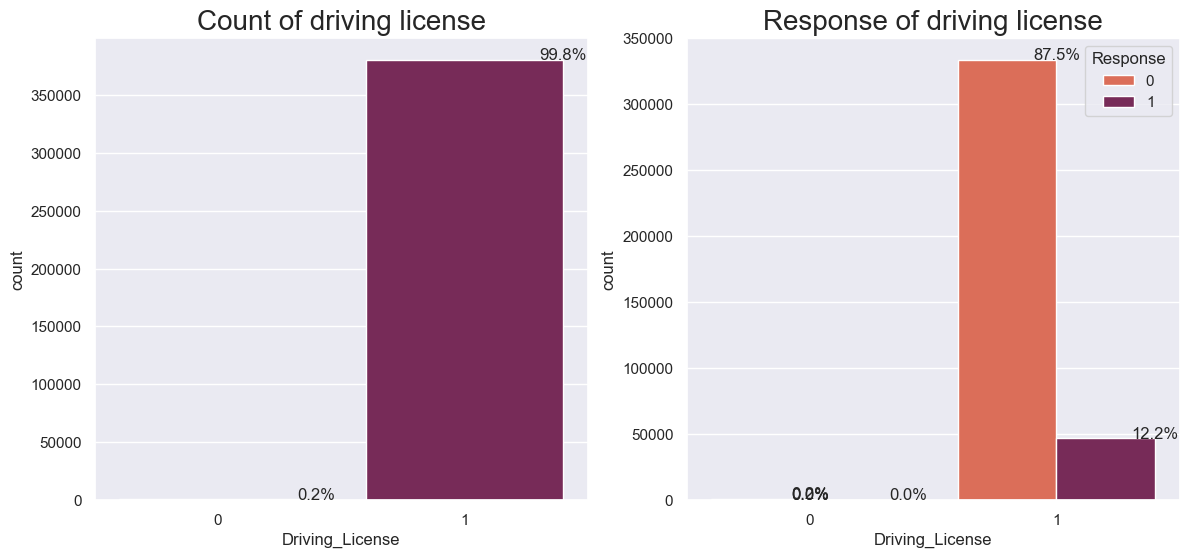

In [7]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Driving_License', palette="rocket_r", data=df)
plt.title('Count of driving license', fontsize=20)
for p in ax1.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax1.annotate(percentage, (x, y), ha='center')
plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Driving_License', hue='Response', palette="rocket_r", data=df)
plt.title('Response of driving license', fontsize=20)
for p in ax2.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax2.annotate(percentage, (x, y), ha='center')
plt.show()

Graph indicates,

* 99.8% of customers have Driving License, whereas 0.2% do not.
* Those who do not have Driving License have very less interest (about 12.2%) in having insuarance.



### Already Insured

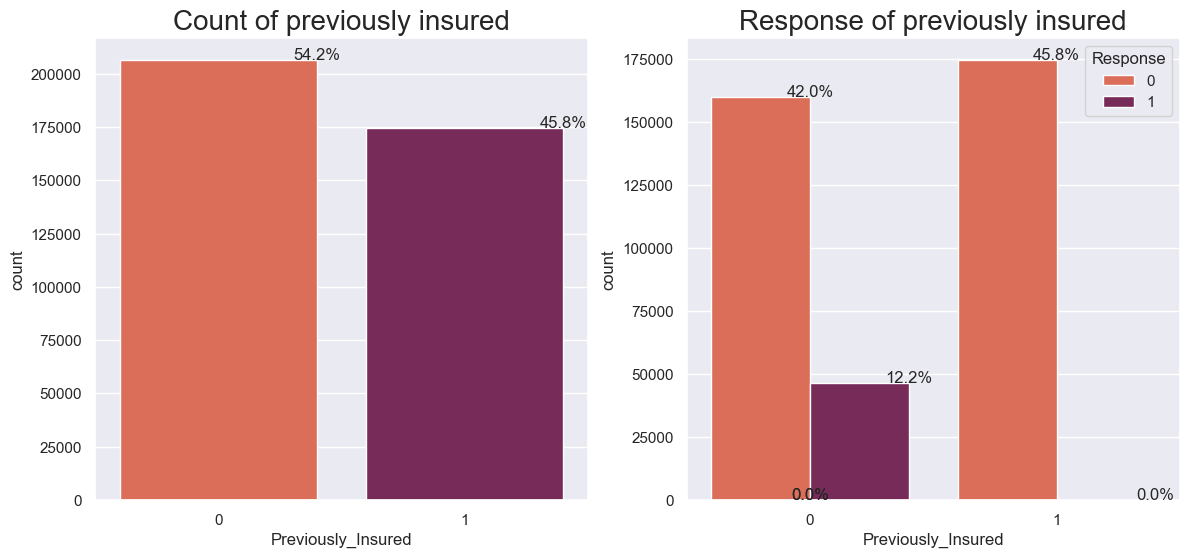

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Previously_Insured',palette="rocket_r", data=df)
plt.title('Count of previously insured',fontsize=20)
for p in ax1.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Previously_Insured',hue='Response',palette="rocket_r", data=df)
plt.title('Response of previously insured',fontsize=20)
for p in ax2.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax2.annotate(percentage, (x, y),ha='center')
plt.show()

Graph indicates,

* 45.8% people are insured previously, in that 12.2% poeple interested to buy the vehicle insurance again (insurance might be expired or should be renewed), this concludes people are aware of insurance policy and ready to pay a premium to avoid certain risks or reduce risk. 

* So buying insurance makes the most sense when the potential loss is great and there is a significant probability of loss.

### Vehicle Age

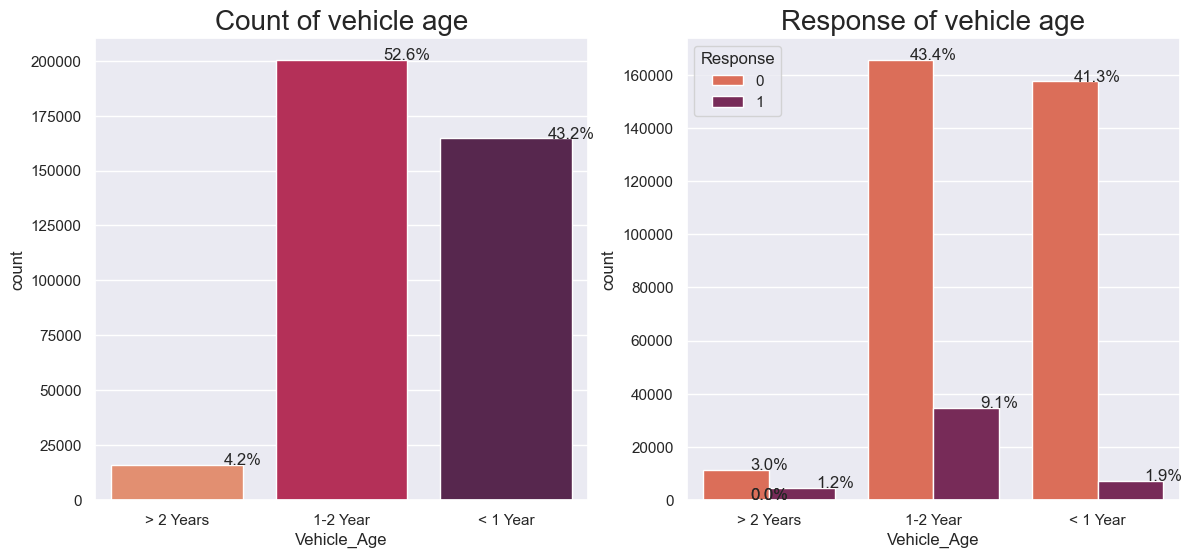

In [14]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Vehicle_Age', palette="rocket_r", data=df)
plt.title('Count of vehicle age', fontsize=20)
for p in ax1.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax1.annotate(percentage, (x, y), ha='center')
plt.subplot(1, 2, 2)
total = float(len(df))
ax2 = sns.countplot(x='Vehicle_Age', hue='Response', palette="rocket_r", data=df)
plt.title('Response of vehicle age', fontsize=20)
for p in ax2.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax2.annotate(percentage, (x, y), ha='center')
plt.show()

Graph indicates,

*	* 4.2% of vehicles are more than two years old
	* 52.6% are between one and two years old, and
	* 43.2% are under one year old.
*	* 1.2% are interested in purchasing vehicle insurance for vehicles older than 2 years
	* 9.1% are interested in purchasing insurance for vehicles between 1 and 2 years old, and
	* 1.9% are interested in purchasing insurance for vehicles older than 1 year.

As vehicle age increases most of people become interested to buy the insurance for reducing the risk.


### Annual Premium

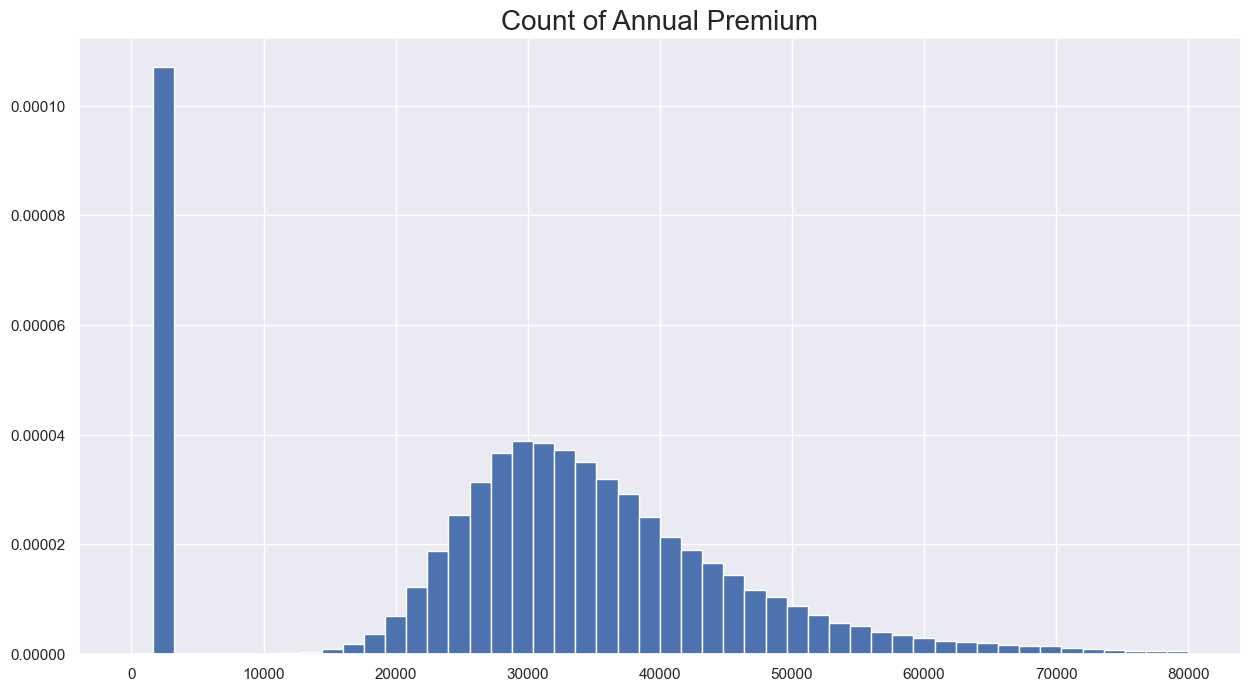

In [9]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
df['Annual_Premium'].hist(figsize=(15,8), bins = 50, density = True, range=[0, 80000])
plt.title('Count of Annual Premium', fontsize=20)
plt.show()

*   From the distribution plot we can infer that the annual premimum variable is right skewed

# Vehicle Damage

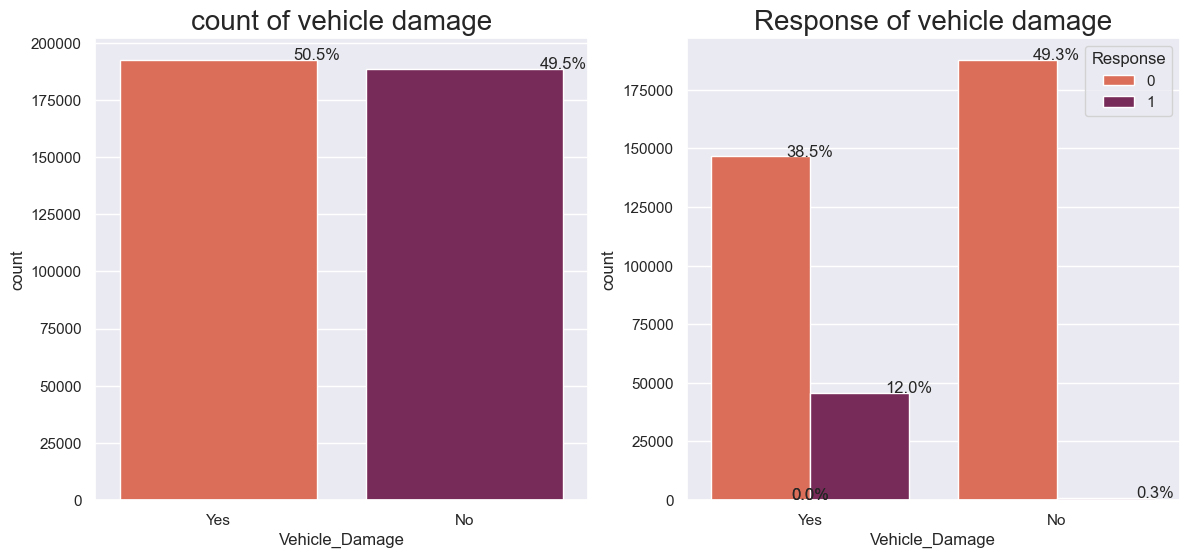

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(df))
ax1 = sns.countplot(x='Vehicle_Damage', palette="rocket_r", data=df)
plt.title('count of vehicle damage', fontsize=20)
for p in ax1.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax1.annotate(percentage, (x, y), ha='center')
plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Vehicle_Damage', hue='Response', palette="rocket_r", data=df)
plt.title('Response of vehicle damage', fontsize=20)
for p in ax2.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax2.annotate(percentage, (x, y), ha='center')
plt.show()

Graph indicates,

*	* 50.5% had experienced incidents of past damage
	* 12.0% of them who experienced incidents of past damage wants to acquire vehicle insurance


### Vintage

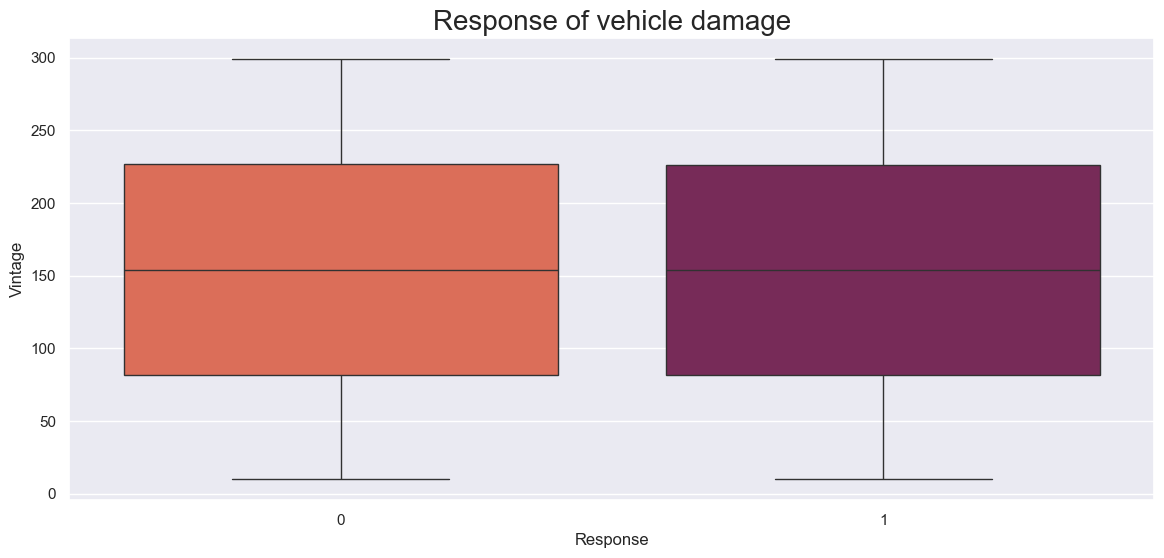

In [19]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Response', y='Vintage', palette="rocket_r", data=df)
plt.title('Response of vehicle damage', fontsize=20)
plt.show()

* Graph indicates, that Vintage has an almost uniform distribution.


### Age

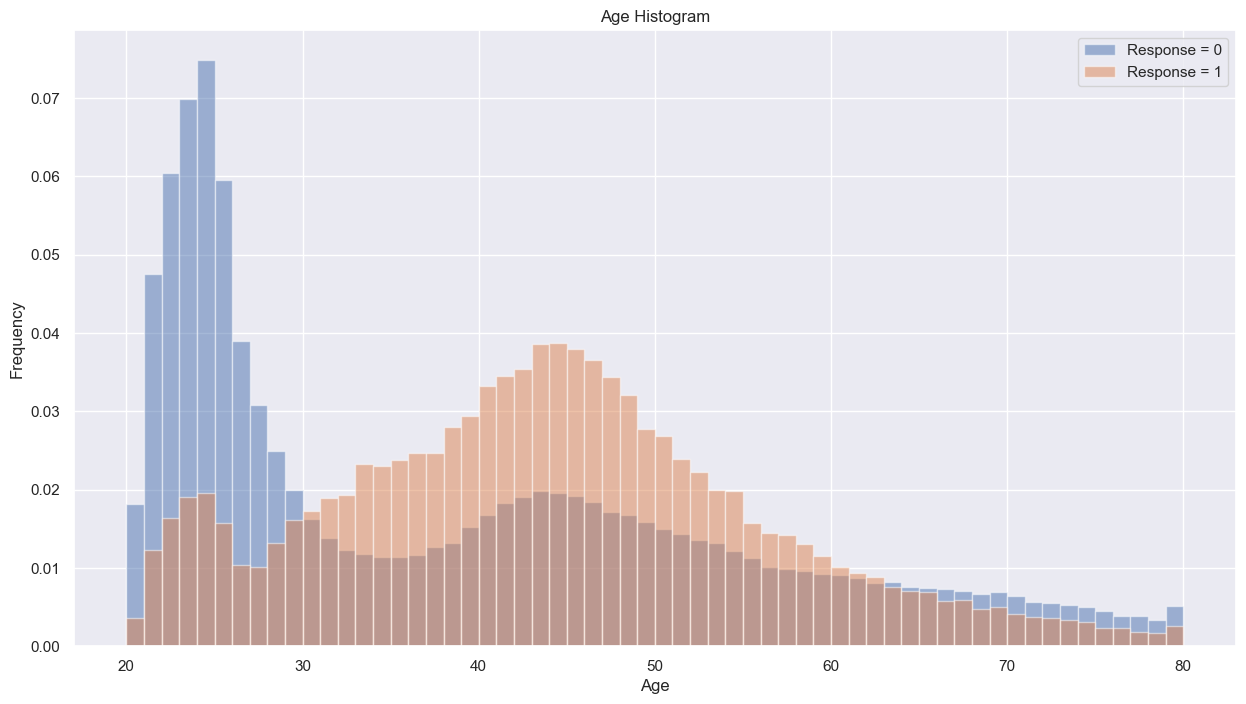

In [20]:
#histogram of Age
plt.figure(figsize = (14,6))
df.groupby('Response').Age.hist(range=[20, 80], align='mid', bins=60, figsize=(15,8), density=True, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.legend(['Response = 0', 'Response = 1'])
plt.show()

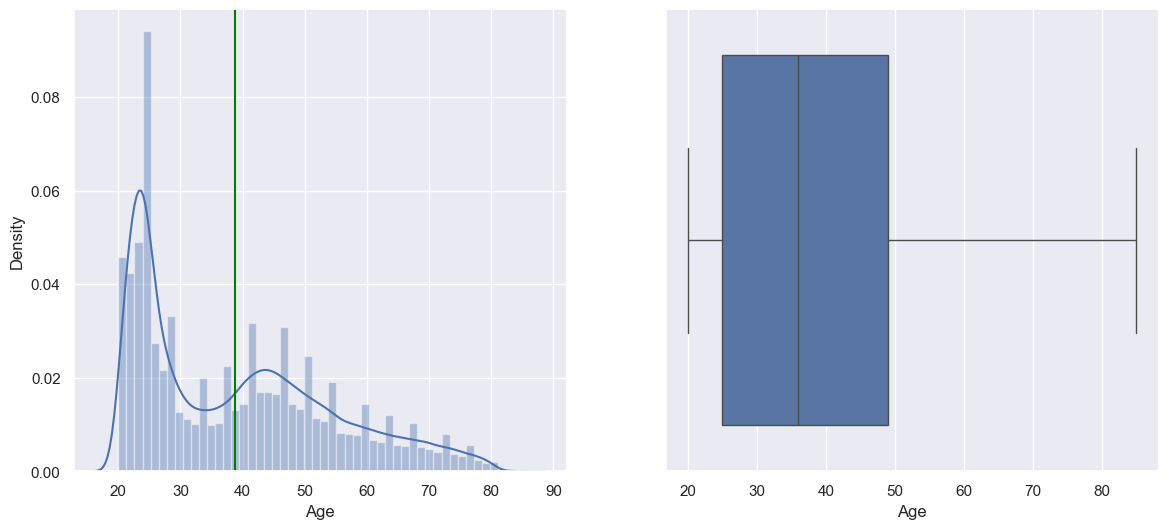

In [21]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.distplot(df['Age'])
ax.axvline(df['Age'].mean(), color='green')
plt.subplot(1,2,2)
sns.boxplot(x='Age', data=df)
plt.show()

Graph indicates,
* The dataset has more individuals of an age 24.
* 40 to 60 year olds had a higher likelihood of purchasing vehicle insurance.

### Giving labels in dataset according to age

In [12]:
df['Ages'] = df['Age']

df.loc[(df['Ages'] >= 20) & (df['Ages'] < 27), 'Age_label'] = 'Teenagers(20-26)'
df.loc[(df['Ages'] >= 27) & (df['Ages'] < 29), 'Age_label'] = 'Young(27-28)'
df.loc[(df['Ages'] >= 29) & (df['Ages'] < 58), 'Age_label'] = 'Middle Age(29-57)'
df.loc[(df['Ages'] >= 58) & (df['Ages'] <= 85), 'Age_label'] = 'Old Age(58-84)'

df.loc[(df['Ages'] >= 20) & (df['Ages'] < 27), 'Ages'] = 0
df.loc[(df['Ages'] >= 27) & (df['Ages'] < 29), 'Ages'] = 1
df.loc[(df['Ages'] >= 29) & (df['Ages'] < 58), 'Ages'] = 2
df.loc[(df['Ages'] >= 58) & (df['Ages'] <= 85), 'Ages'] = 3

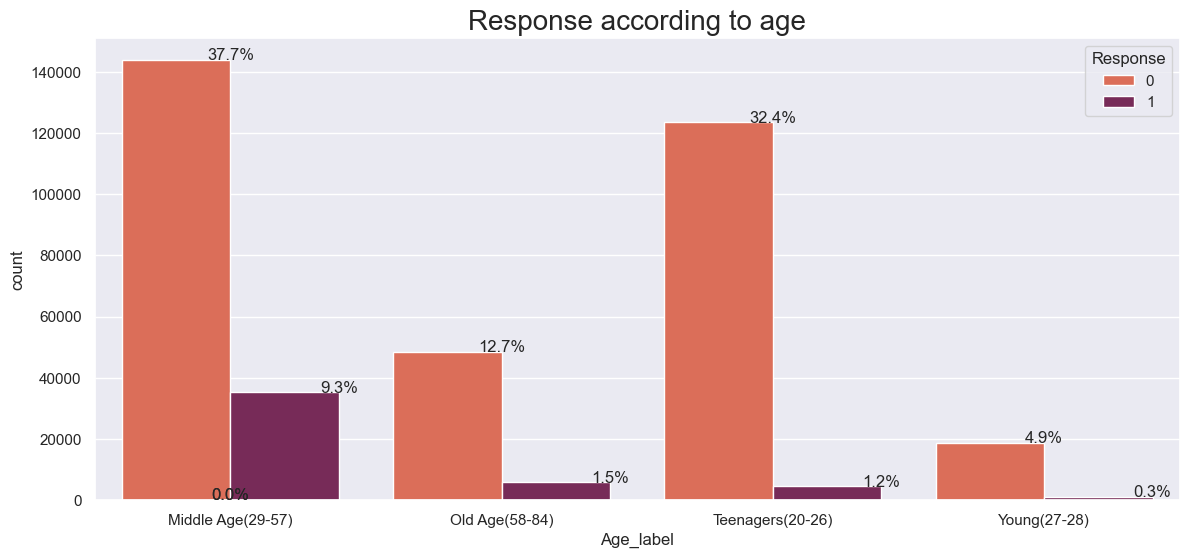

In [14]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
total = float(len(df))
ax = sns.countplot(x='Age_label', hue='Response', palette="rocket_r", data=df)
plt.title('Response according to age', fontsize=20)
for p in ax.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax.annotate(percentage, (x, y), ha='center')
plt.show()

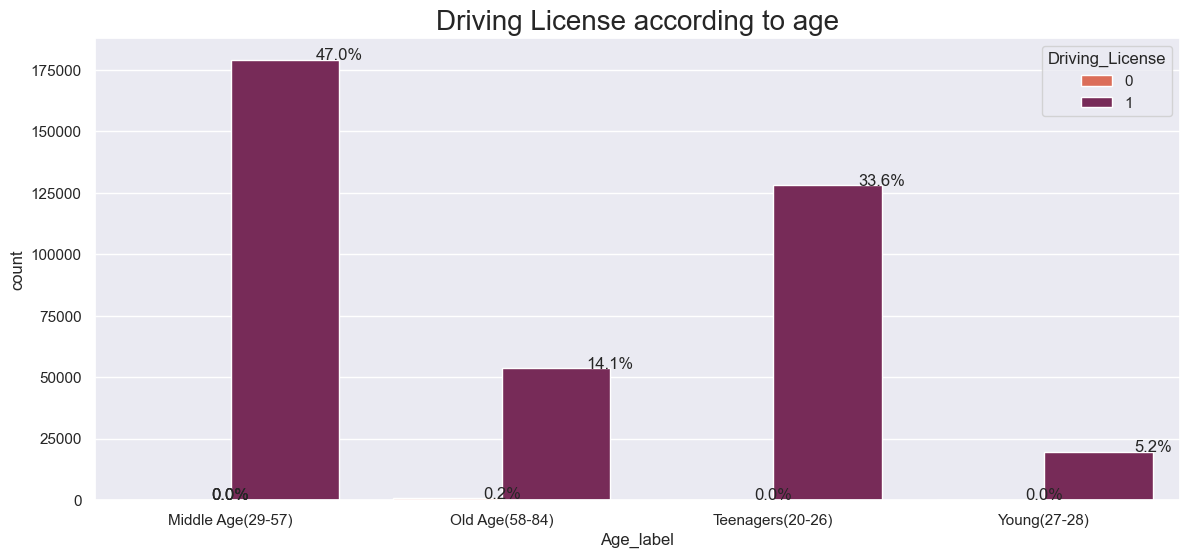

In [15]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
total = float(len(df))
ax = sns.countplot(x='Age_label', hue='Driving_License', palette="rocket_r", data=df)
plt.title('Driving License according to age', fontsize=20)
for p in ax.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax.annotate(percentage, (x, y),ha='center')
plt.show()

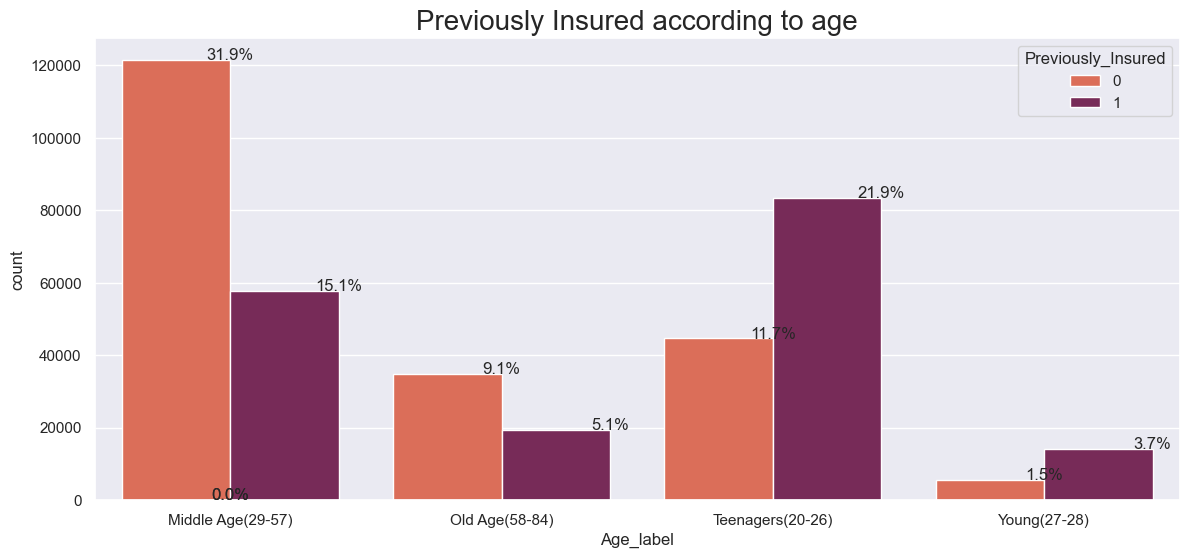

In [16]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
total = float(len(df))
ax = sns.countplot(x='Age_label', hue='Previously_Insured', palette="rocket_r", data=df)
plt.title('Previously Insured according to age',fontsize=20)
for p in ax.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax.annotate(percentage, (x, y), ha='center')
plt.show()

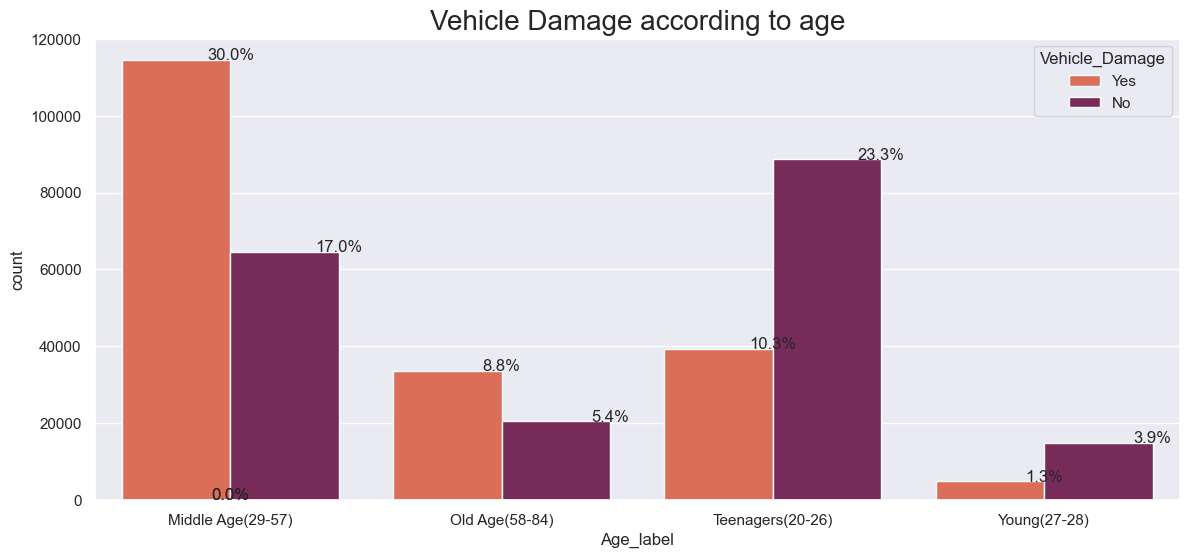

In [17]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
total = float(len(df))
ax = sns.countplot(x='Age_label', hue='Vehicle_Damage', palette="rocket_r", data=df)
plt.title('Vehicle Damage according to age',fontsize=20)
for p in ax.patches:
	percentage = '{:.1f}%'.format(100 * p.get_height()/total)
	x = p.get_x() + p.get_width()
	y = p.get_height()
	ax.annotate(percentage, (x, y), ha='center')
plt.show()

Graph indicates distribution according to age:

* 9.3% of people in their middle age people, interested in purchasing insurance.
* 47% of middle-aged individuals have a Driver Licence.
* 21.9% of people in their teens have health insurance.
* 21.9% of persons in their teens had insurance previously.

So most teenagers have insurance and are aware of their policy. So the target audience might be middle-aged people and teenagers to generate more leads for insurance companies. 

In [23]:
df.drop(columns=['Ages', 'Age_label'], axis=1, inplace=True)

# Correlation Matrix

<Axes: >

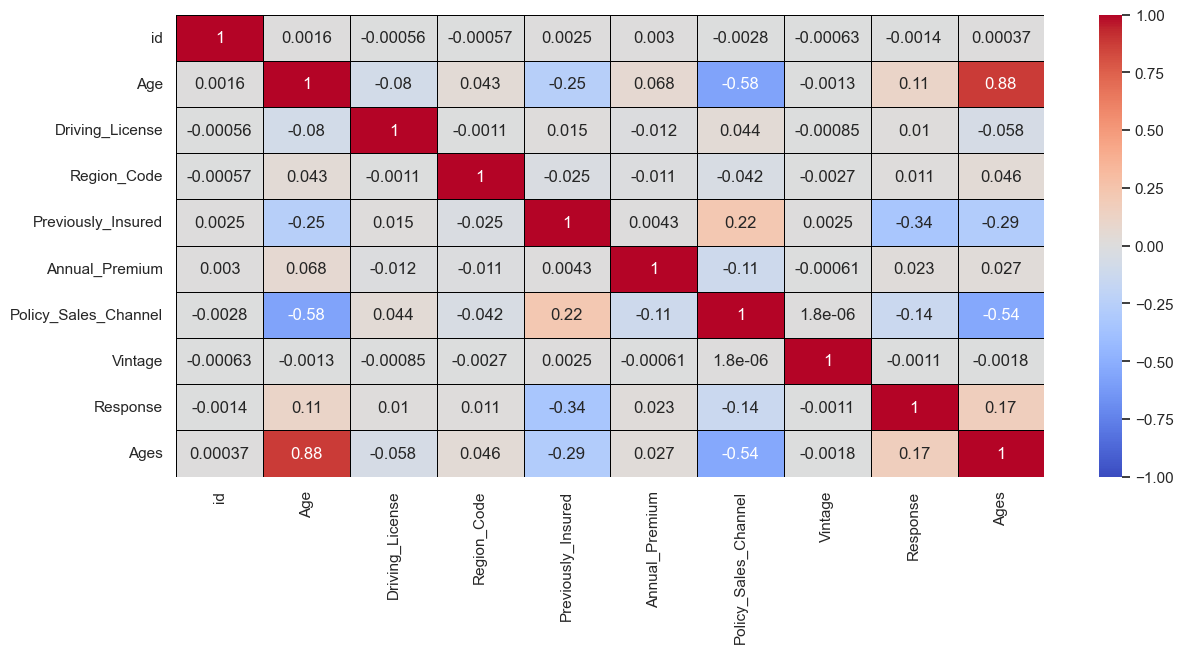

In [37]:
plt.figure(figsize = (14,6))
sns.heatmap(df.drop(columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'], axis=1).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linecolor='black', linewidths=0.5)

In [39]:
# Finding Multicollinearity
def cal_vif(X):
	# Calculating VIF
	vif = pd.DataFrame()
	vif["variables"] = X.columns
	vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
	return vif
cal_vif(df[[i for i in df.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.977201
1,Age,33.634125
2,Driving_License,38.970012
3,Region_Code,4.954396
4,Previously_Insured,2.022773
5,Annual_Premium,4.202844
6,Policy_Sales_Channel,7.831653
7,Vintage,4.373567
8,Ages,12.426216


In [27]:
df.drop(columns=['Driving_License'], axis=1, inplace=True)

**Correlation:** You can only determine how much two variables are linearly reliant on one another by looking at their correlations.

* The variables are said to be positively connected if the value is positive.
* The variables are said to be negatively linked if the value is negative.
* It is said that there is no correlation between the variables if the value is zero or very near to it.

Since practically every customer has a driver's license, it is useless to insure anyone without one because it would be detrimental to the business. Hence, we wouldn't provide vehicle insurance to someone who didn't have a license to drive. As we can drop driving license column as they are not providing any valuable information.



## Removing outliers

### Outliers in 'Annual_Premium' from Box-plot was observed previously

Identifying using IQR

In [3]:
# inter-quartile range for the columns with outliers
Q1 = df[['Annual_Premium']].quantile(0.25)
Q3 = df[['Annual_Premium']].quantile(0.75)
IQR = Q3-Q1
IQR

Annual_Premium    14995.0
dtype: float64

Removing using IQR

In [4]:
# determining the upper and lower limit for the removal of outliers
df[['Annual_Premium']] = df[['Annual_Premium']][~((df[['Annual_Premium']] < Q1 - (1.5*IQR)) | (df[['Annual_Premium']] > Q3 + (1.5*IQR)))]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        370789 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
 12  Ages                  381109 non-null  int64  
 13  Age_label             381109 non-null  object 
dtypes: float64(3), int64(7), object(4)
memory usage: 40.

## Handling null values


Filling empty values

In [5]:
df['Annual_Premium'] = df['Annual_Premium'].fillna(df['Annual_Premium'].median())

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
 12  Ages                  381109 non-null  int64  
 13  Age_label             381109 non-null  object 
dtypes: float64(3), int64(7), object(4)
memory usage: 40.

# Step 4. Feature Engineering and Data Pre-processing

## Feature encoding

### Substituting numberic values to categorical labels

In [6]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

In [34]:
df.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,41.0,1,0,0,27496.0,152.0,39,0


## Model Building

### Preparing data to feed

In [7]:
x = df[['Gender', 'Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Vintage']]
y = df['Response']

In [80]:
# check for imbalance in data 
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

*   ML techniques like decision trees and logistic regression show a bias in favour of the majority class and frequently disregard the minority class. Resampling is the method we employ to solve this problem.


# Step 5. Resampling

In [8]:
# Resampling
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x, y)

{"After Random Over Sampling Of Minor Class Total Samples are": len(y_resampled), "Original dataset shape": Counter(y), "Resampled dataset shape": Counter(y_resampled)}

{'After Random Over Sampling Of Minor Class Total Samples are': 668798,
 'Original dataset shape': Counter({0: 334399, 1: 46710}),
 'Resampled dataset shape': Counter({1: 334399, 0: 334399})}

# Step 6: Data Spliting

## Train Test Split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, random_state=42, test_size=0.3)

{'Train': {'x': x_train.shape, 'y': y_train.shape}, 'Test': {'x': x_test.shape, 'y': y_test.shape}}

{'Train': {'x': (468158, 7), 'y': (468158,)},
 'Test': {'x': (200640, 7), 'y': (200640,)}}

# Step 7. Data Normalization

### Dataset normalization

In [10]:
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Step 8. Machine Learning model

**These machine learning algorithms will be train.**

* Logitcal Regression
* Decision Tree
* Random Forest
* KNN
* Gradient Boost
* XGBoost
* LightBGM

**Description about paramters for judging model performace**

* **Precision:** Precision is the ratio of true positive predictions to the total number of positive predictions.
* **Recall:** Recall is the ratio of true positive predictions to the total number of actual positive cases.
* **F1-Score:** F1-Score is the harmonic mean of precision and recall.
* **Support:** The support is the number of samples of the true response that lie in that class.
* **Confusion Matrix:** The confusion matrix shows the number of true positive, false positive, true negative, and false negative predictions made by the model.
* **ROC Curve:** A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity).
* **Classification Report:** The classification report visualizer displays the precision, recall, F1, and support scores for the model. In order to support easier interpretation and problem detection, the report integrates numerical scores with a color-coded heatmap. All heatmaps are in the range (0.0, 1.0) to facilitate easy comparison of classification models across different classification reports.


## Model 1. **Logistic Regression**

In [41]:
# Importing Logistic Regression
logistic_model = LogisticRegression(random_state=30)
logistic_model = logistic_model.fit(x_train, y_train)
# Making prediction
y_pred_lg = logistic_model.predict(x_test)
y_pred_prob_lg = logistic_model.predict_proba(x_test)[:,1]

### Evaluation

In [43]:
RS_lgt = recall_score(y_test, y_pred_lg)
PS_lgt = precision_score(y_test, y_pred_lg)
f1S_lgt = f1_score(y_test, y_pred_lg)
AS_lgt = accuracy_score(y_pred_lg, y_test)
acu_lgt = roc_auc_score(y_pred_lg, y_test)

lgt_metric = {'Recall Score': RS_lgt, 'Precision Score': PS_lgt, 'F1 Score': f1S_lgt, 'Accuracy Score': AS_lgt, 'ROC AUC Score': acu_lgt}

pd.DataFrame({'Parameters': ['Recall Score', 'Precision Score', 'F1 Score', 'Accuracy Score', 'ROC AUC Score'], 'Results': [RS_lgt, PS_lgt, f1S_lgt, AS_lgt, acu_lgt]})

,Parameters,Results
0,Recall Score,0.976130
1,Precision Score,0.707201
2,F1 Score,0.820183
3,Accuracy Score,0.785601
4,ROC AUC Score,0.834228


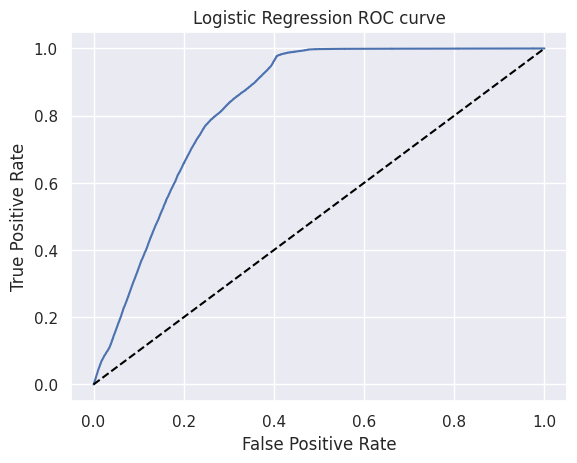

In [43]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lg)
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

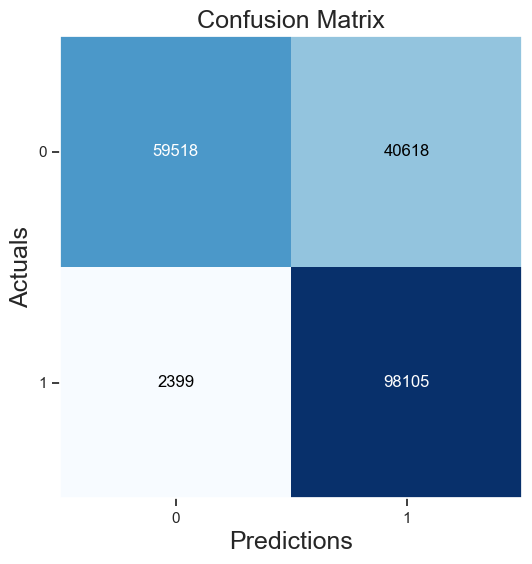

array([[59518, 40618],
       [ 2399, 98105]], dtype=int64)

In [97]:
# confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_lg)
fig, ax = plot_confusion_matrix(conf_mat=cm_logistic, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
cm_logistic

In [102]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100136
           1       0.71      0.98      0.82    100504

    accuracy                           0.79    200640
   macro avg       0.83      0.79      0.78    200640
weighted avg       0.83      0.79      0.78    200640



Model Coefficients

In [103]:
logistic_model.coef_

array([[-0.05682903, -0.24855544, -1.74940703,  0.45978125,  0.9224943 ,
         0.04083163, -0.0051602 ]])

Previously_Insured   -1.749407
Age                  -0.248555
Gender               -0.056829
Vintage              -0.005160
Annual_Premium        0.040832
Vehicle_Age           0.459781
Vehicle_Damage        0.922494
dtype: float64




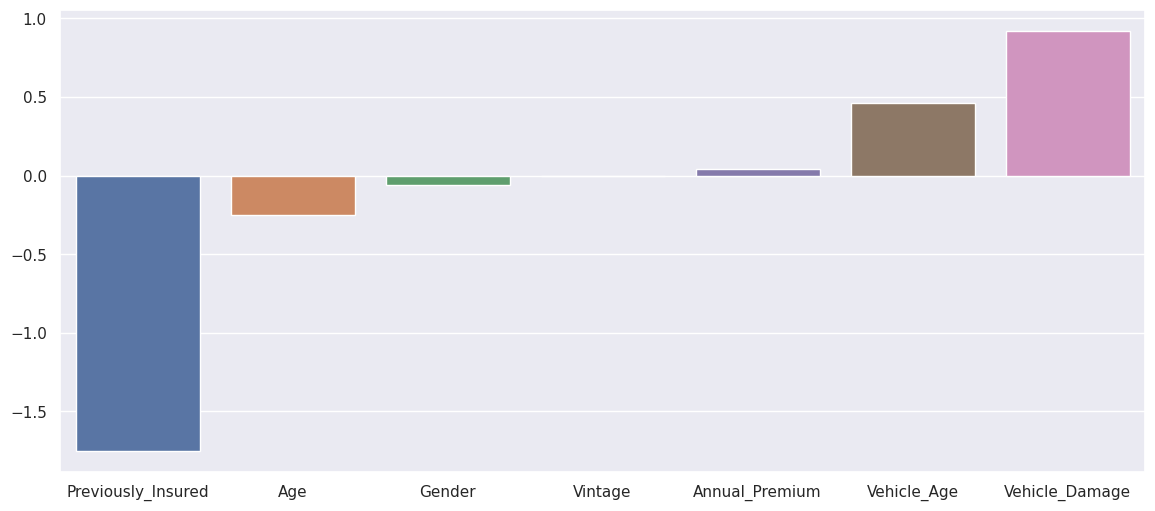

In [47]:
coef = pd.Series(data=logistic_model.coef_[0], index=x.columns)
coef = coef.sort_values()
print(coef)
print('\n')
plt.figure(figsize=(14, 6))
sns.barplot(x=coef.index, y=coef.values);
plt.show()

## Model 1. **Hyperparameter tuning for Logistic Regression**

In [42]:
logistic_model_tunning = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1, 5, 9], 'penalty': ['l2','l1', 'elasticnet']}
l_m_t = GridSearchCV(estimator=logistic_model_tunning, param_grid=param_logreg, cv=3, n_jobs=-1, verbose=1, scoring='recall')
l_m_t.fit(x_train, y_train)
log_tuned = l_m_t.best_estimator_
y_tuned_log = log_tuned.predict(x_test)
y_tuned_log_prob = log_tuned.predict_proba(x_test)[:,1]

Fitting 3 folds for each of 15 candidates, totalling 45 fits


### Evaluation

In [44]:
# Evaluation
RS_lgt_tun= recall_score(y_test, y_tuned_log)
PS_lgt_tun= precision_score(y_test, y_tuned_log)
f1S_lgt_tun= f1_score(y_test, y_tuned_log)
AS_lgt_tun= accuracy_score(y_tuned_log, y_test)
acu_lgt_tun = roc_auc_score(y_tuned_log, y_test)

lgt_tun_metric = {'Recall Score': RS_lgt_tun, 'Precision Score': PS_lgt_tun, 'F1 Score': f1S_lgt_tun, 'Accuracy Score': AS_lgt_tun, 'ROC AUC Score': acu_lgt_tun}

pd.DataFrame({'Parameters': ['Recall Score', 'Precision Score', 'F1 Score', 'Accuracy Score', 'ROC AUC Score'], 'Results': [RS_lgt_tun, PS_lgt_tun, f1S_lgt_tun, AS_lgt_tun, acu_lgt_tun]})

,Parameters,Results
0,Recall Score,0.976130
1,Precision Score,0.707201
2,F1 Score,0.820183
3,Accuracy Score,0.785601
4,ROC AUC Score,0.834228


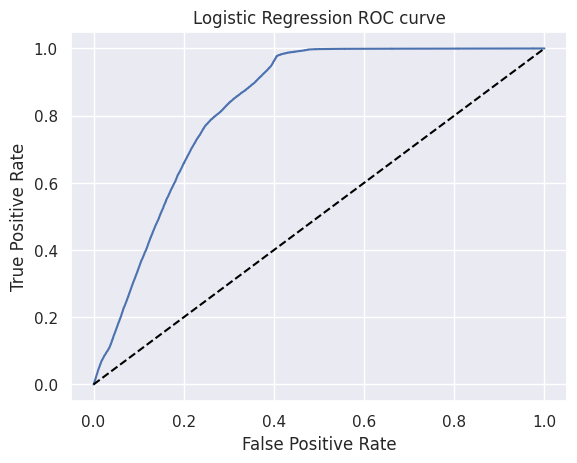

In [50]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_tuned_log_prob)
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

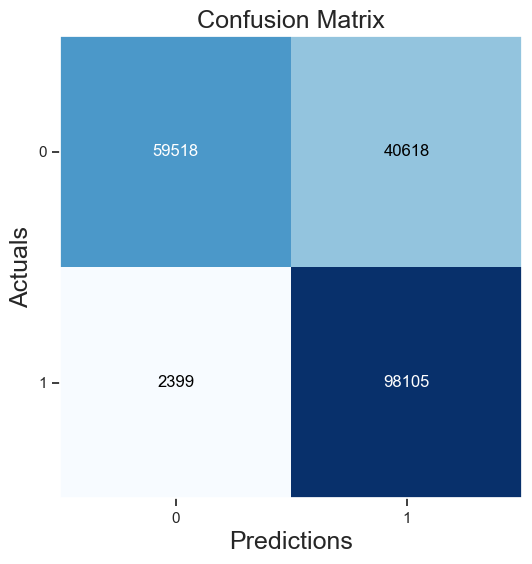

array([[59518, 40618],
       [ 2399, 98105]], dtype=int64)

In [108]:
# confusion matrix
cm_logistic_tun = confusion_matrix(y_test, y_tuned_log)
fig, ax = plot_confusion_matrix(conf_mat=cm_logistic_tun, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
cm_logistic_tun

In [52]:
print(classification_report(y_test, y_tuned_log))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100136
           1       0.71      0.98      0.82    100504

    accuracy                           0.79    200640
   macro avg       0.83      0.79      0.78    200640
weighted avg       0.83      0.79      0.78    200640



## Model 2. **Decision Tree**

In [45]:
dt_model = DecisionTreeClassifier(random_state=30)
dt_model = dt_model.fit(x_train, y_train)
# Making prediction
dt_pred = dt_model.predict(x_test)
dt_pred_prob = dt_model.predict_proba(x_test)[:,1]

### Evaluation

In [46]:
# Evaluation
RS_dt = recall_score(y_test, dt_pred)
PS_dt = precision_score(y_test, dt_pred)
f1S_dt = f1_score(y_test, dt_pred)
AS_dt = accuracy_score(y_test, dt_pred)
acu_dt = roc_auc_score(y_test, dt_pred)

dt_metric = {'Recall_Score': RS_dt, 'Precision Score': PS_dt, 'F1 Score': f1S_dt, 'Accuracy Score': AS_dt, 'ROC AUC Score': acu_dt}

pd.DataFrame({'Parameters': ['Recall Score', 'Precision Score', 'F1 Score', 'Accuracy Score', 'ROC AUC Score'], 'Results': [RS_dt, PS_dt, f1S_dt, AS_dt, acu_dt]})

,Parameters,Results
0,Recall Score,0.992398
1,Precision Score,0.884361
2,F1 Score,0.935270
3,Accuracy Score,0.931190
4,ROC AUC Score,0.931078


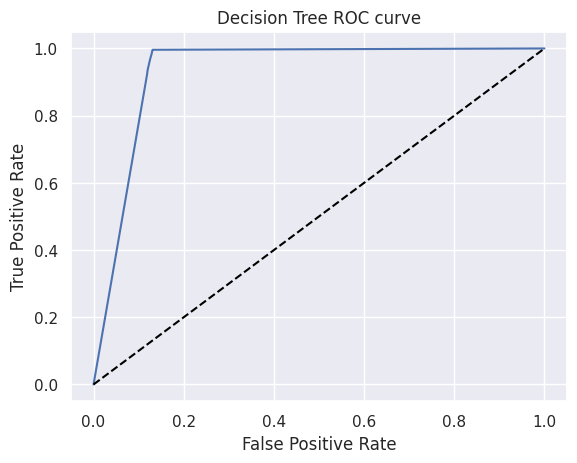

In [55]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, dt_pred_prob)
plt.title('Decision Tree ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

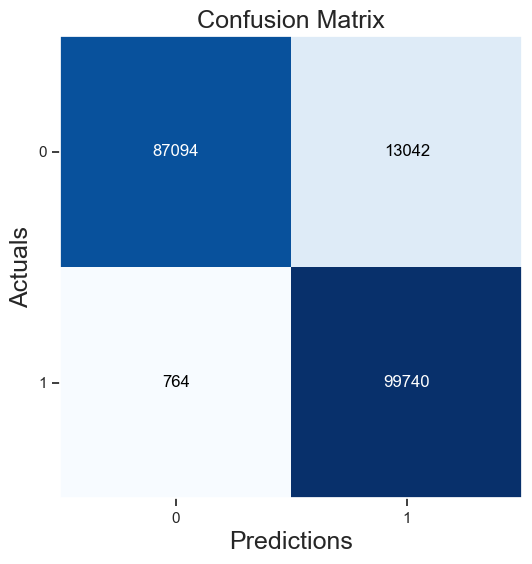

array([[87094, 13042],
       [  764, 99740]], dtype=int64)

In [113]:
# confusion matrix
cm_dt = confusion_matrix(y_test, dt_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_dt, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
cm_dt

In [57]:
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     87858
           1       0.99      0.88      0.94    112782

    accuracy                           0.93    200640
   macro avg       0.93      0.94      0.93    200640
weighted avg       0.94      0.93      0.93    200640



Feature Importance

<Axes: >

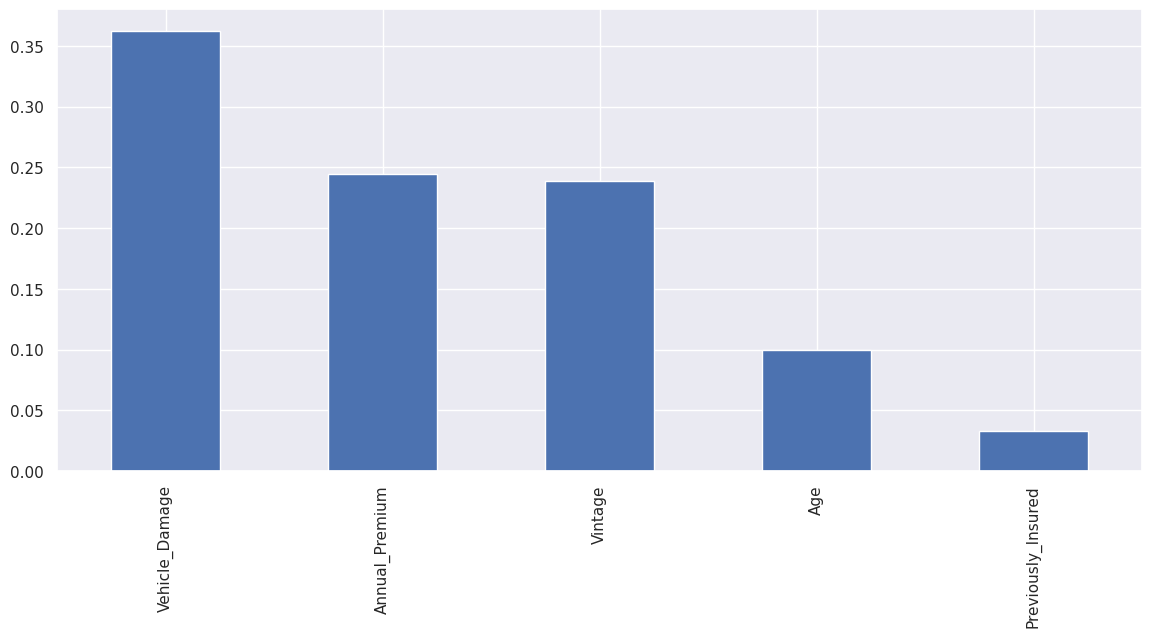

In [58]:
plt.figure(figsize=(14,6))
feat_importances = pd.Series(dt_model.feature_importances_, index=x_resampled.columns)
feat_importances.nlargest(5).plot(kind='bar')

## Model 3. **Random Forest**

In [47]:
# Train
rf_model = RandomForestClassifier(random_state=30)
rf_model = rf_model.fit(x_train, y_train)
# Prediction
rf_pred = rf_model.predict(x_test)
rf_pred_proba = rf_model.predict_proba(x_test)[:,1]

### Evaluation

In [48]:
# Evaluation
RS_rf = recall_score(y_test, rf_pred)
PS_rf = precision_score(y_test, rf_pred)
f1S_rf = f1_score(y_test, rf_pred)
AS_rf = accuracy_score(y_test, rf_pred)
acu_rf = roc_auc_score(y_test, rf_pred)

rf_metric = {'Recall Score': RS_rf, 'Precision Score': PS_rf, 'F1 Score': f1S_rf, 'Accuracy Score': AS_rf, 'ROC AUC Score': acu_rf}

pd.DataFrame({'Parameters': ['Recall Score', 'Precision Score', 'F1 Score', 'Accuracy Score', 'ROC AUC Score'], 'Results': [RS_rf, PS_rf, f1S_rf, AS_rf, acu_rf]})

,Parameters,Results
0,Recall Score,0.994498
1,Precision Score,0.879905
2,F1 Score,0.933698
3,Accuracy Score,0.929251
4,ROC AUC Score,0.929132


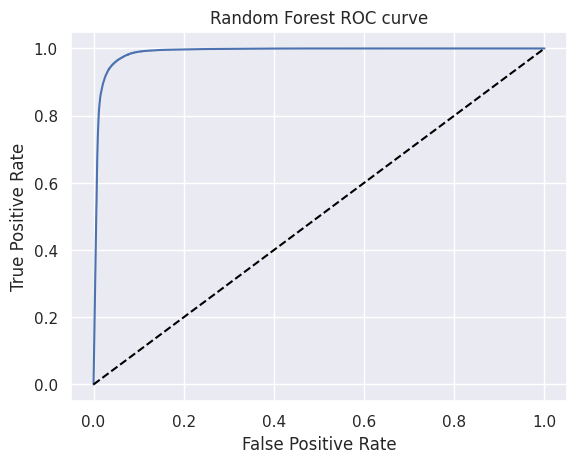

In [61]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba)
plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[86494 13642]
 [  553 99951]]




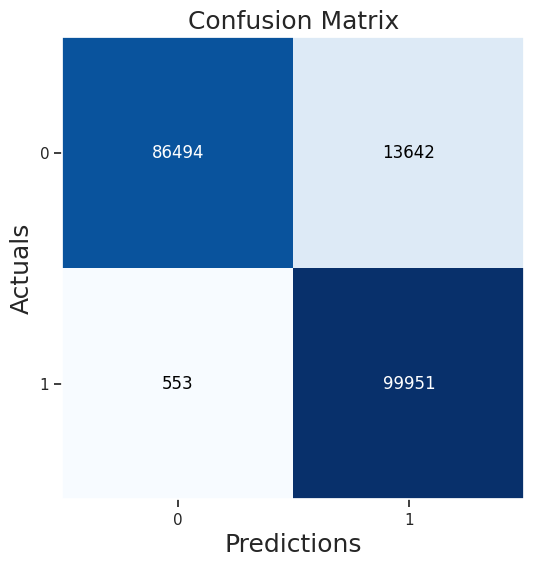

In [62]:
# confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_rf, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
cm_rf

In [64]:
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     87047
           1       0.99      0.88      0.93    113593

    accuracy                           0.93    200640
   macro avg       0.93      0.94      0.93    200640
weighted avg       0.94      0.93      0.93    200640



## Feature Importance

<Axes: >

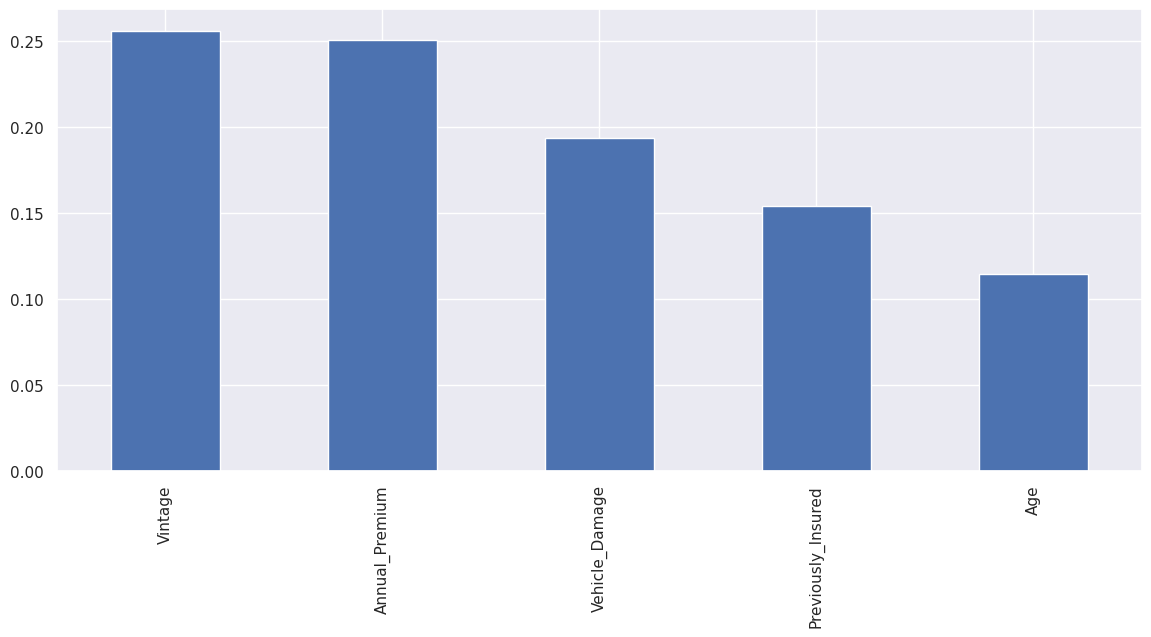

In [65]:
plt.figure(figsize=(14,6))
feat_importances = pd.Series(rf_model.feature_importances_,index=x_resampled.columns)
feat_importances.nlargest(5).plot(kind='bar')

## Model 4. **KNN**

In [11]:
# Train
knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(x_train, y_train)
# Prediction
knn_pred = knn_model.predict(x_test)
knn_pred_prob = knn_model.predict_proba(x_test)[:,1]

In [14]:
# Evaluation
RS_knn= recall_score(y_test, knn_pred)
PS_knn= precision_score(y_test, knn_pred)
f1S_knn= f1_score(y_test, knn_pred)
AS_knn= accuracy_score(y_test, knn_pred)
acu_knn = roc_auc_score(y_test, knn_pred)

knn_metric = {'Recall Score': RS_knn, 'Precision Score': PS_knn, 'F1 Score': f1S_knn, 'Accuracy Score': AS_knn, 'ROC AUC Score': acu_knn}

pd.DataFrame({'Parametrs': ['Recall Score', 'Precision Score', 'F1 Score', 'Accuracy Score', 'ROC AUC Score'], 'Results': [RS_knn, PS_knn, f1S_knn, AS_knn, acu_knn]})

,Parametrs,Results
0,Recall Score,0.965315
1,Precision Score,0.790931
2,F1 Score,0.869465
3,Accuracy Score,0.854810
4,ROC AUC Score,0.854607


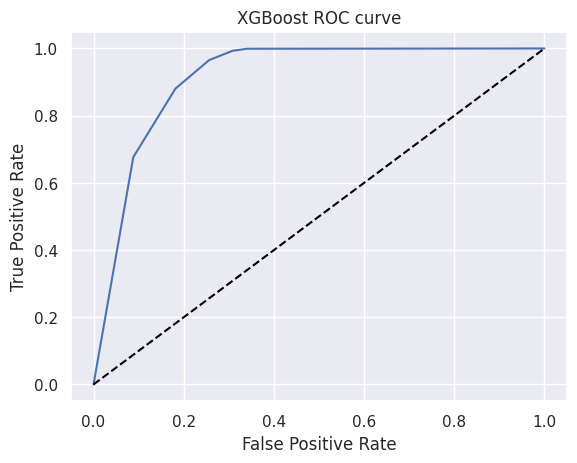

In [68]:
fpr, tpr, _ = roc_curve(y_test, knn_pred_prob)
plt.title('KNN ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

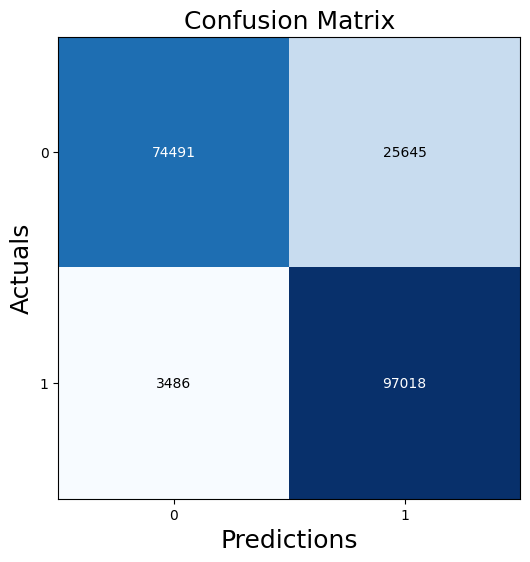

array([[74491, 25645],
       [ 3486, 97018]], dtype=int64)

In [15]:
# confusion matrix
cm_knn= confusion_matrix(y_test, knn_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_knn, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
cm_knn

In [70]:
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84     77986
           1       0.97      0.79      0.87    122654

    accuracy                           0.85    200640
   macro avg       0.85      0.87      0.85    200640
weighted avg       0.88      0.85      0.86    200640



## Model 4. **Hyperparameter tuning for KNN**

In [17]:
KNN_tuning = KNeighborsClassifier()
param_KNN = {'n_neighbors': [5,7,9], 'weights': ['uniform', 'distance'], 'p': [2, 1]}
model_KNN_tuned = GridSearchCV(estimator=KNN_tuning, param_grid=param_KNN, cv=3, n_jobs=-1 , verbose=1, scoring='recall')
model_KNN_tuned.fit(x_train, y_train)
KNN_tuned = model_KNN_tuned.best_estimator_
y_tuned_KNN = KNN_tuned.predict(x_test)
y_tuned_KNN_prob = KNN_tuned.predict_proba(x_test)[:,1]

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [19]:
# Evaluation
RS_knn_tun = recall_score(y_test, y_tuned_KNN )
PS_knn_tun = precision_score(y_test, y_tuned_KNN )
f1S_knn_tun = f1_score(y_test, y_tuned_KNN )
AS_knn_tun = accuracy_score(y_test, y_tuned_KNN )
acu_knn_tun = roc_auc_score(y_test, y_tuned_KNN )

knn_tun_metric = {'Recall Score': RS_knn_tun, 'Precision Score': PS_knn_tun, 'F1 Score': f1S_knn_tun, 'Accuracy Score': AS_knn_tun, 'ROC AUC Score': acu_knn_tun}

pd.DataFrame({'Parameters': ['Recall Score', 'Precision Score', 'F1 Score', 'Accuracy Score', 'ROC AUC Score'], 'Results': [RS_knn_tun, PS_knn_tun, f1S_knn_tun, AS_knn_tun, acu_knn_tun]})

,Parameters,Results
0,Recall Score,0.994508
1,Precision Score,0.798951
2,F1 Score,0.886068
3,Accuracy Score,0.871890
4,ROC AUC Score,0.871665


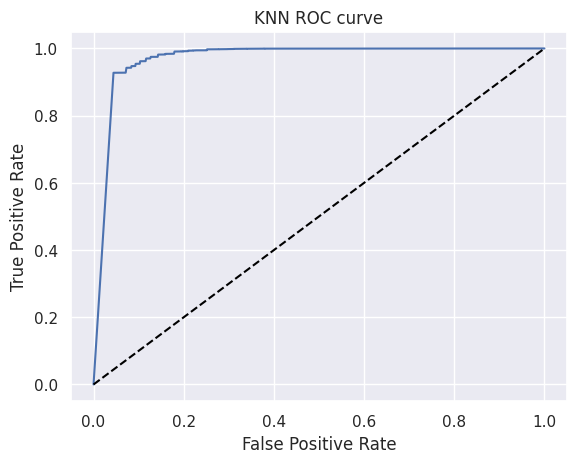

In [73]:
# roc curve
fpr, tpr, _ = roc_curve(y_test, y_tuned_KNN_prob)
plt.title('KNN ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

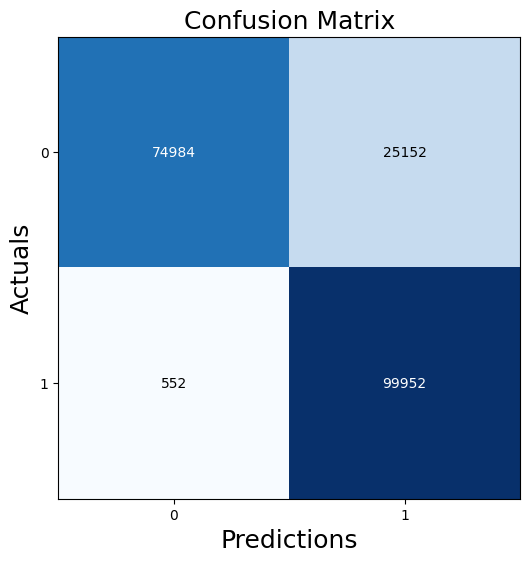

array([[74984, 25152],
       [  552, 99952]], dtype=int64)

In [20]:
# confusion matrix
cm_knn = confusion_matrix(y_test, y_tuned_KNN)
fig, ax = plot_confusion_matrix(conf_mat=cm_knn, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
cm_knn

In [75]:
print(classification_report(y_tuned_KNN, y_test))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85     75536
           1       0.99      0.80      0.89    125104

    accuracy                           0.87    200640
   macro avg       0.87      0.90      0.87    200640
weighted avg       0.90      0.87      0.87    200640



## Model 5. **Gradient Boosting**

In [22]:
GB_model = GradientBoostingClassifier(random_state=30)
GB_model = GB_model.fit(x_train,y_train)
# Making prediction
GB_pred = GB_model.predict(x_test)
GB_pred_prob = GB_model.predict_proba(x_test)[:,1]

### Evalutaion

In [24]:
# Evaluation
RS_GB = recall_score(y_test, GB_pred)
PS_GB = precision_score(y_test, GB_pred)
f1S_GB = f1_score(y_test, GB_pred)
AS_GB = accuracy_score(y_test, GB_pred)
acu_GB = roc_auc_score(y_test, GB_pred)

GB_metric = {'Recall Score': RS_GB, 'Precision Score': PS_GB, 'F1 Score': f1S_GB, 'Accuracy Score': AS_GB, 'ROC AUC Score': acu_GB}

pd.DataFrame({'Parameters': ['Recall Score', 'Precision Score', 'F1 Score', 'Accuracy Score', 'ROC AUC Score'], 'Results': [RS_GB, PS_GB, f1S_GB, AS_GB, acu_GB]})

,Parameters,Results
0,Recall Score,0.927376
1,Precision Score,0.734615
2,F1 Score,0.819817
3,Accuracy Score,0.795803
4,ROC AUC Score,0.795562


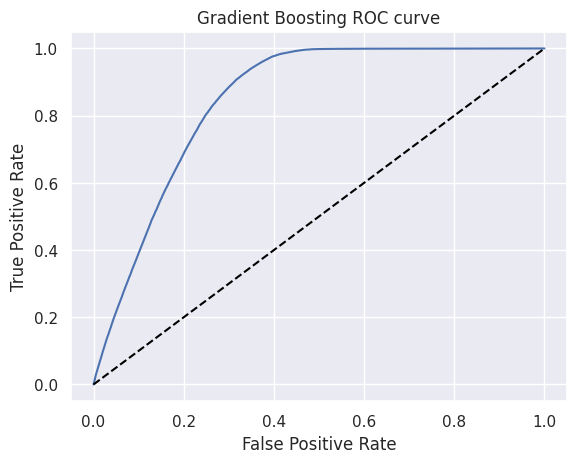

In [78]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, GB_pred_prob)
plt.title('Gradient Boosting ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

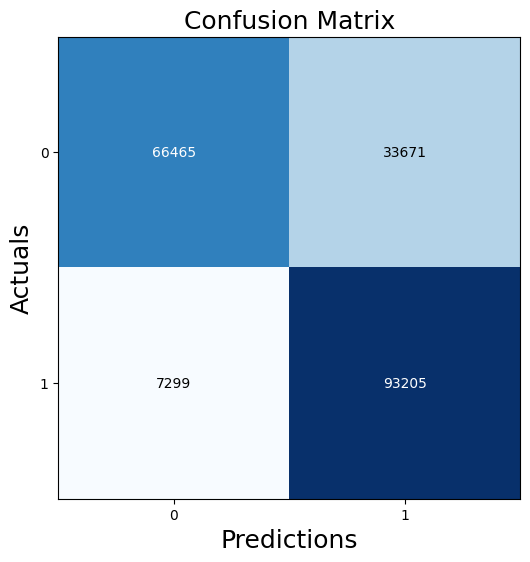

array([[66465, 33671],
       [ 7299, 93205]], dtype=int64)

In [25]:
# Confusion matrix
cm_GB = confusion_matrix(y_test, GB_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_GB, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
cm_GB

In [80]:
print(classification_report(GB_pred, y_test))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76     73764
           1       0.93      0.73      0.82    126876

    accuracy                           0.80    200640
   macro avg       0.80      0.82      0.79    200640
weighted avg       0.83      0.80      0.80    200640



## Model 6. **XGBoost**

In [27]:
# Train
XG_model = XGBClassifier(random_state=30)
XG_model = XG_model.fit(x_train, y_train)
# Prediction
XG_pred = XG_model.predict(x_test)
XG_pred_prob = XG_model.predict_proba(x_test)[:,1]

### Evaluation

In [29]:
# Evaluation
RS_XG = recall_score(y_test, XG_pred)
PS_XG = precision_score(y_test, XG_pred)
f1S_XG = f1_score(y_test, XG_pred)
AS_XG = accuracy_score(y_test, XG_pred)
acu_XG = roc_auc_score(y_test, XG_pred)

XG_metric = {'Recall Score': RS_XG, 'Precision Score': PS_XG, 'F1 Score': f1S_XG, 'Accuracy Score': AS_XG, 'ROC AUC Score': acu_XG}

pd.DataFrame({'Parameters': ['Recall Score', 'Precision Score', 'F1 Score', 'Accuracy Score', 'ROC AUC Score'], 'Results': [RS_XG, PS_XG, f1S_XG, AS_XG, acu_XG]})

,Parameters,Results
0,Recall Score,0.933664
1,Precision Score,0.742787
2,F1 Score,0.827359
3,Accuracy Score,0.804820
4,ROC AUC Score,0.804583


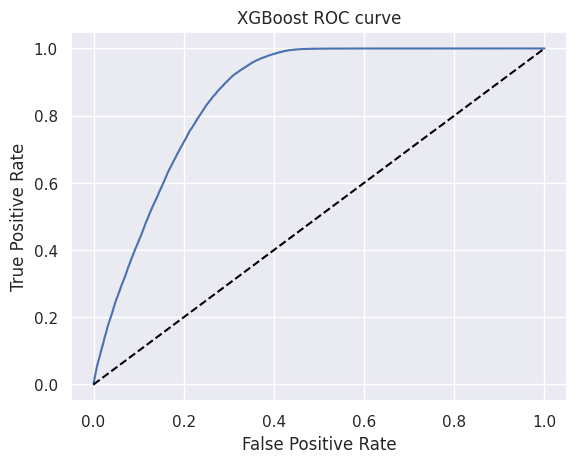

In [83]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, XG_pred_prob)
plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

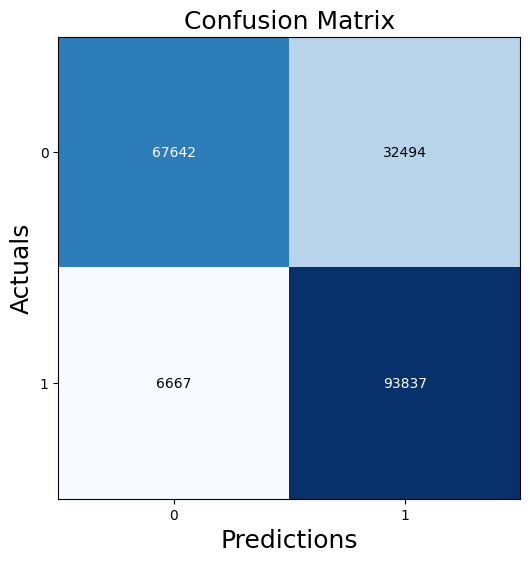

array([[67642, 32494],
       [ 6667, 93837]], dtype=int64)

In [30]:
# Confucion matrix
cm_XB = confusion_matrix(y_test, XG_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_XB, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
cm_XB

In [85]:
print(classification_report(XG_pred, y_test))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78     74492
           1       0.93      0.74      0.83    126148

    accuracy                           0.80    200640
   macro avg       0.80      0.83      0.80    200640
weighted avg       0.84      0.80      0.81    200640



## Model 7. **LightBGM**

In [31]:
# Train
lgbm_model = LGBMClassifier(random_state=30)
lgbm_model = lgbm_model.fit(x_train, y_train)
# Prediction
lgbm_pred = lgbm_model.predict(x_test)
lgbm_pred_prob = lgbm_model.predict_proba(x_test)[:,1]

[LightGBM] [Info] Number of positive: 233895, number of negative: 234263
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 468158, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499607 -> initscore=-0.001572
[LightGBM] [Info] Start training from score -0.001572


### Evaluation

In [33]:
# Evaluation
RS_lgbm = recall_score(y_test, lgbm_pred)
PS_lgbm = precision_score(y_test, lgbm_pred)
f1S_lgbm = f1_score(y_test, lgbm_pred)
AS_lgbm = accuracy_score(y_test, lgbm_pred)
acu_lgbm = roc_auc_score(y_test, lgbm_pred)

lgbm_metric = {'Recall Score': RS_lgbm, 'Precision Score': PS_lgbm, 'F1 Score': f1S_lgbm, 'Accuracy Score': AS_lgbm, 'ROC AUC Score': acu_lgbm}

pd.DataFrame({'Parameters': ['Recall Score', 'Precision Score', 'F1 Score', 'Accuracy Score', 'ROC AUC Score'], 'Results': [RS_lgbm, PS_lgbm, f1S_lgbm, AS_lgbm, acu_lgbm]})

,Parameters,Results
0,Recall Score,0.927744
1,Precision Score,0.736864
2,F1 Score,0.821360
3,Accuracy Score,0.797852
4,ROC AUC Score,0.797613


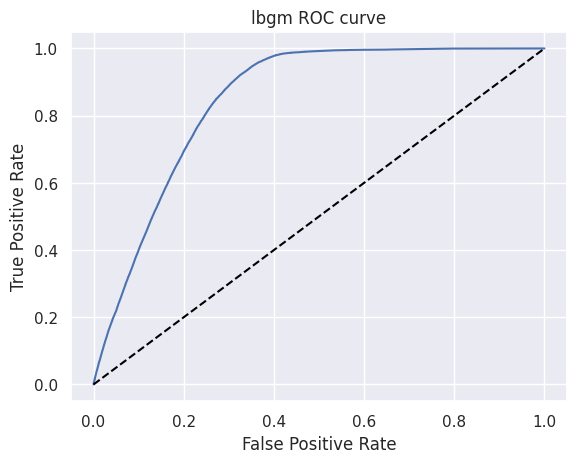

In [88]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, lgbm_pred_prob)
plt.title('lbgm ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

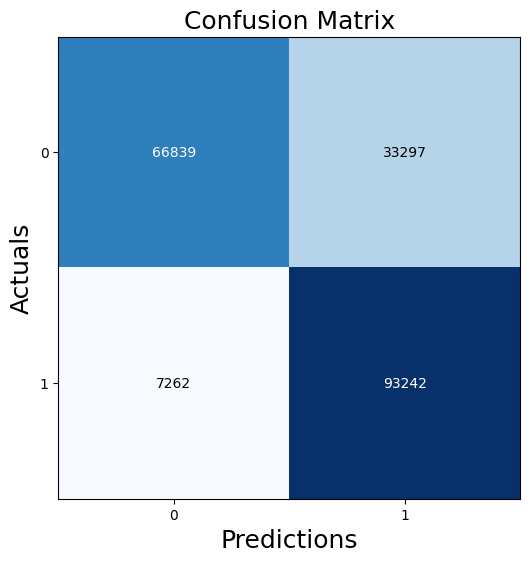

array([[66839, 33297],
       [ 7262, 93242]], dtype=int64)

In [34]:
# Confusion matrix
cm_lgbm = confusion_matrix(y_test, lgbm_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_lgbm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
cm_lgbm

In [90]:
print(classification_report(lgbm_pred, y_test))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77     74101
           1       0.93      0.74      0.82    126539

    accuracy                           0.80    200640
   macro avg       0.80      0.82      0.79    200640
weighted avg       0.83      0.80      0.80    200640



## Model 7. **Hyperparameter tuning for LightGBM**

In [35]:
f2 = make_scorer(fbeta_score, beta=2)
lgbm = LGBMClassifier()
parameters = {'n_estimators': [200,300,400], 'max_depth': [3,5,9]}
cv = HalvingGridSearchCV(lgbm, parameters, scoring=f2, cv=3, n_jobs=-1, verbose=1)
cv.fit(x_train, y_train)
cv.best_params_, cv.best_score_
tuned_lgbm = LGBMClassifier(**cv.best_params_)
tuned_lgbm.fit(x_train, y_train)
y_tun_lgbm = tuned_lgbm.predict(x_test)
y_tun_pred_prob = tuned_lgbm.predict_proba(x_test)[:,1]

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 52017
max_resources_: 468158
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 52017
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 1
n_candidates: 3
n_resources: 156051
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 2
n_candidates: 1
n_resources: 468153
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Number of positive: 233895, number of negative: 234263
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 468158, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499607 -> initscore=-0.001572
[LightGBM] [Info] Start training from score -0.001572
[LightGBM] [

### Evaluation

In [37]:
# Evaluation
RS_lgbm_tun = recall_score(y_test, y_tun_lgbm)
PS_lgbm_tun = precision_score(y_test, y_tun_lgbm)
f1S_lgbm_tun = f1_score(y_test, y_tun_lgbm)
AS_lgbm_tun = accuracy_score(y_test, y_tun_lgbm)
acu_lgbm_tun = roc_auc_score(y_test, y_tun_lgbm)

lgbm_tun_metric = {'Recall Score': RS_lgbm_tun, 'Precision Score': PS_lgbm_tun, 'F1 Score': f1S_lgbm_tun, 'Accuracy Score': AS_lgbm_tun, 'ROC AUC Score': acu_lgbm_tun}

pd.DataFrame({'Parameters': ['Recall Score', 'Precision Score', 'F1 Score', 'Accuracy Score', 'ROC AUC Score'], 'Results': [RS_lgbm_tun, PS_lgbm_tun, f1S_lgbm_tun, AS_lgbm_tun, acu_lgbm_tun]})

,Parameters,Results
0,Recall Score,0.925207
1,Precision Score,0.736111
2,F1 Score,0.819897
3,Accuracy Score,0.796392
4,ROC AUC Score,0.796155


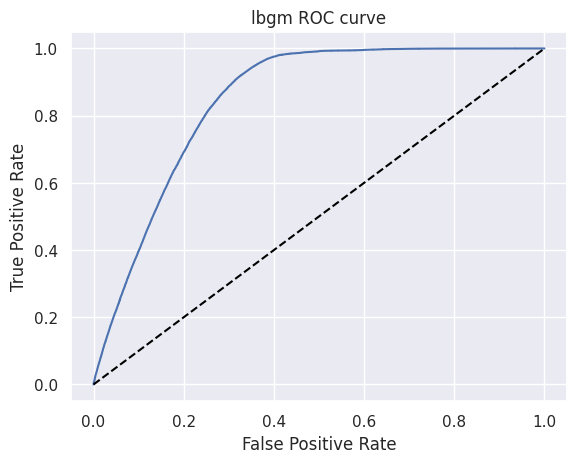

In [93]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_tun_pred_prob)
plt.title('lbgm ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

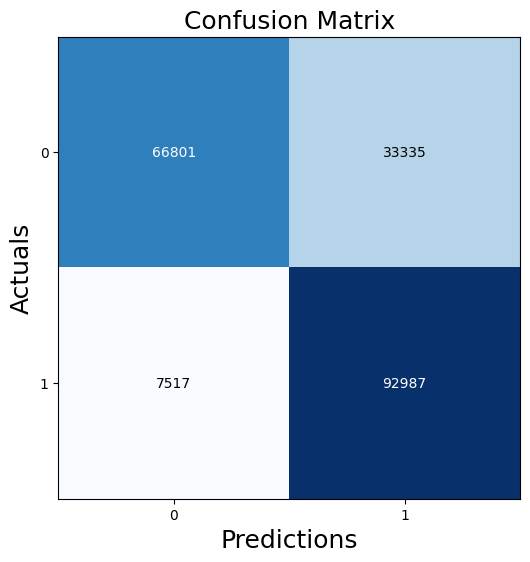

array([[66801, 33335],
       [ 7517, 92987]], dtype=int64)

In [38]:
# Confusion matrix
cm_lgbm_tun = confusion_matrix(y_test, y_tun_lgbm)
fig, ax = plot_confusion_matrix(conf_mat=cm_lgbm_tun, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
cm_lgbm_tun

In [95]:
print(classification_report(y_tun_lgbm, y_test))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77     74179
           1       0.93      0.74      0.82    126461

    accuracy                           0.80    200640
   macro avg       0.80      0.82      0.79    200640
weighted avg       0.83      0.80      0.80    200640



# Step 9. Results comparision

In [49]:
pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting', 'Extreme Gradient Boosting', 'LGBM'], 'Recall Score': [RS_lgt, RS_dt, RS_rf, RS_knn, RS_GB, RS_XG, RS_lgbm], 'Precision Score': [PS_lgt, RS_dt, PS_rf, PS_knn, PS_GB, PS_XG, PS_lgbm], 'F1 Score': [f1S_lgt, f1S_dt, f1S_rf, f1S_knn, f1S_GB, f1S_XG, f1S_lgbm], 'Accuracy Score': [AS_lgt, AS_dt, AS_rf, AS_knn, AS_GB, AS_XG, AS_lgbm], 'ROC AUC Score': [acu_lgt, acu_dt, acu_rf, acu_knn, acu_GB, acu_XG, acu_lgbm]})

,Model,Recall Score,Precision Score,F1 Score,Accuracy Score,ROC AUC Score
0,Logistic Regression,0.976130,0.707201,0.820183,0.785601,0.834228
1,Decision Tree,0.992398,0.992398,0.935270,0.931190,0.931078
2,Random Forest,0.994498,0.879905,0.933698,0.929251,0.929132
3,KNN,0.965315,0.790931,0.869465,0.854810,0.854607
4,Gradient Boosting,0.927376,0.734615,0.819817,0.795803,0.795562
5,Extreme Gradient Boosting,0.933664,0.742787,0.827359,0.804820,0.804583
6,LGBM,0.927744,0.736864,0.821360,0.797852,0.797613


## Result of Hyperparameter tunning model

In [50]:
pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'LGBM'], 'Recall Score': [RS_lgt_tun, RS_knn_tun, RS_lgbm_tun], 'Precision Score': [PS_lgt_tun, PS_knn_tun, PS_lgbm_tun], 'F1 Score': [f1S_lgt_tun, f1S_knn_tun, f1S_lgbm_tun], 'Accuracy Score': [AS_lgt_tun, AS_knn_tun, AS_lgbm_tun], 'ROC AUC Score': [acu_lgt_tun, acu_knn_tun, acu_lgbm_tun]})

,Model,Recall Score,Precision Score,F1 Score,Accuracy Score,ROC AUC Score
0,Logistic Regression,0.976130,0.707201,0.820183,0.785601,0.834228
1,KNN,0.994508,0.798951,0.886068,0.871890,0.871665
2,LGBM,0.925207,0.736111,0.819897,0.796392,0.796155


# Step 10. Conclusion

### Operations from first glance of data

*	* There were no duplicates or null values, thus there was no need to treat them.
	* By using the inter quartile range, outlier was found in one column, were eliminated and treated
	* Then dealt with null data.
	* Splitted the dataset into train and test splits after feature encoding three columns.


### Insights from data analysis of dataset:

*	* The gender variable in the dataset is spread nearly evenly. The male category is marginally larger than the female category, and the likelihood of purchasing insurance is also slightly higher. The response rate of those who are not interested in purchasing vehicle insurance is higher than that of those who are interested in buying vehicle insurance.
	* Only 12.3% people are interested in buying vehicle insurance and 87.7% are not interested in buying vehicle insurance.
	* So people who own the bike may already have vehicle insurance, or people might not be aware of insurance policy and pricing factors, which means the firm needs to come up with good marketing techniques and a pricing strategy to create awareness and offer an affordable price to the customers in order to reach out to more customers to generate more leads.

*	* The response rate of those who are not interested in purchasing vehicle insurance is higher than that of those who are not interested in buying vehicle insurance.
	* 99.8% of customers have DL, whereas 0.2% do not have DL. Only a small percentage of people who have a DL (12.2%) are interested in purchasing vehicle insurance. So almost all the people who own vehicles have DL because it's mandatory when you have a bike, and only a small percentage of people are interested in buying vehicle insurance.
	* The possible reason might be that people who own the bike may already have vehicle insurance or insurance might be expired.

*	* 45.8% of people are insured previously, in that 12.2% of people interested to buy the vehicle insurance again, Which means people are aware of insurance policy and ready to pay a premium amount, for better off taking actions to avoid certain risks or reduce risk.
	* So buying insurance makes the most sense when the potential loss is great and there is a significant probability of loss.

*	* Around 4.2% of vehicles are more than two years old, 52.6% are between one and two years old, and 43.2% are under one year old. 1.2% are interested in purchasing vehicle insurance for vehicles older than 2 years, 9.1% are interested in purchasing insurance for vehicles between 1 and 2 years old, and 1.9% are interested in purchasing insurance for vehicles older than 1 year.
	* As vehicle age increases most of the people are aware of insurance and interested to buy the insurance for reducing the risk.

*	* 50.5% of the vehicles have past damage. 12.0% of people who have had a damaged vehicle in the past want to acquire vehicle insurance.
	* So 50 percent of vehicles are damaged and 50 percent are not damaged, which means people with damaged vehicles (12%) are interested in buying insurance and are aware of vehicle insurance policies and its benefits, while the rest of the people might already have purchased insurance and do not need to purchase again.

*	* Around 4.2% of vehicles are more than two years old, 52.6% are between one and two years old, and 43.2% are under one year old.
	* 1.2% are interested in purchasing vehicle insurance for vehicles older than 2 years, 9.1% are interested in purchasing insurance for vehicles between 1 and 2 years old, and 1.9% are interested in purchasing insurance for vehicles older than 1 year.
	* As vehicle age increases most of the people are aware of insurance and interested to buy the insurance for reducing the risk.

*	* The dataset has more individuals with an age of 24.
	* 40 to 60-year-olds had a higher likelihood of purchasing vehicle insurance. 9.3% of people in their middle age are interested in purchasing insurance. Almost 47% of middle-aged individuals have a driver's licence.
	* About 21.9% of people in their teens have health insurance.
	* Around 21.9% of persons in their teens have had insurance previously.
	* So most teenagers have insurance and are aware of their policy. Thus, the target audience might be middle-aged people and teenagers to generate more leads for insurance companies.

### Offerings from models

* 6 machine learning algorithms were applied to see which customers might be interested in purchasing vehicle insurance and we also used hyperparameter tuning for three models to discover which model gives the best results.
* Vehicle damage and annual premium are the two most significant features seen in decision trees, while vintage and annual premium are seen in random forests.
